In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from utils.normalizar import normalizar_0_1, normalizar_neg1_1
from utils.diferenciaciones import diferenciar
from utils.estandarizacion import estandarizar
from utils.escalas import logaritmica, cuadrada, raiz
from utils.descomp_cuantitativa import tendencia, estacionalidad
from utils.fourier import dom_freq
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
pd.set_option("display.max_columns", None)

ruta_dataset = 'data/train_FD001.txt'

headers = [
    "unit_number",
    "time_cycles",
    "operational_setting_1",
    "operational_setting_2",
    "operational_setting_3"]

headers += [f"sensor_{i}" for i in range(1, 22)]

In [3]:
df_FD001 = pd.read_csv(ruta_dataset, delim_whitespace=True, header=None, names=headers)
df_FD001.head()

/tmp/ipykernel_3730/1599241784.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_FD001 = pd.read_csv(ruta_dataset, delim_whitespace=True, header=None, names=headers)


unit_number  time_cycles  operational_setting_1  operational_setting_2  \
0            1            1                -0.0007                -0.0004   
1            1            2                 0.0019                -0.0003   
2            1            3                -0.0043                 0.0003   
3            1            4                 0.0007                 0.0000   
4            1            5                -0.0019                -0.0002   

   operational_setting_3  sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  \
0                  100.0    518.67    641.82   1589.70   1400.60     14.62   
1                  100.0    518.67    642.15   1591.82   1403.14     14.62   
2                  100.0    518.67    642.35   1587.99   1404.20     14.62   
3                  100.0    518.67    642.35   1582.79   1401.87     14.62   
4                  100.0    518.67    642.37   1582.85   1406.22     14.62   

   sensor_6  sensor_7  sensor_8  sensor_9  sensor_10  sensor_11  sensor_12  \
0     21.61    554.36   2388.06   9046.19        1.3      47.47     521.66   
1     21.61    553.75   2388.04   9044.07        1.3      47.49     522.28   
2     21.61    554.26   2388.08   9052.94        1.3      47.27     522.42   
3     21.61    554.45   2388.11   9049.48        1.3      47.13     522.86   
4     21.61    554.00   2388.06   9055.15        1.3      47.28     522.19   

   sensor_13  sensor_14  sensor_15  sensor_16  sensor_17  sensor_18  \
0    2388.02    8138.62     8.4195       0.03        392       2388   
1    2388.07    8131.49     8.4318       0.03        392       2388   
2    2388.03    8133.23     8.4178       0.03        390       2388   
3    2388.08    8133.83     8.3682       0.03        392       2388   
4    2388.04    8133.80     8.4294       0.03        393       2388   

   sensor_19  sensor_20  sensor_21  
0      100.0      39.06    23.4190  
1      100.0      39.00    23.4236  
2      100.0      38.95    23.3442  
3      100.0      38.88    23.3739  
4      100.0      38.90    23.4044

## Trabajo con 5 sensores del DataSet

In [4]:
df = df_FD001.copy()
sensores = [f'sensor_{i}' for i in range(1,10)]
df = df[sensores]
df['conteo'] = range(1, len(df) + 1)
df = df[['conteo'] + sensores]

# Eliminar las columnas con valores constantes en sensores
constantes = ['sensor_1', 'sensor_5', 'sensor_6', 'sensor_7']
df = df.drop(columns=constantes)

df.head()

conteo  sensor_2  sensor_3  sensor_4  sensor_8  sensor_9
0       1    641.82   1589.70   1400.60   2388.06   9046.19
1       2    642.15   1591.82   1403.14   2388.04   9044.07
2       3    642.35   1587.99   1404.20   2388.08   9052.94
3       4    642.35   1582.79   1401.87   2388.11   9049.48
4       5    642.37   1582.85   1406.22   2388.06   9055.15

# 1 Graficar

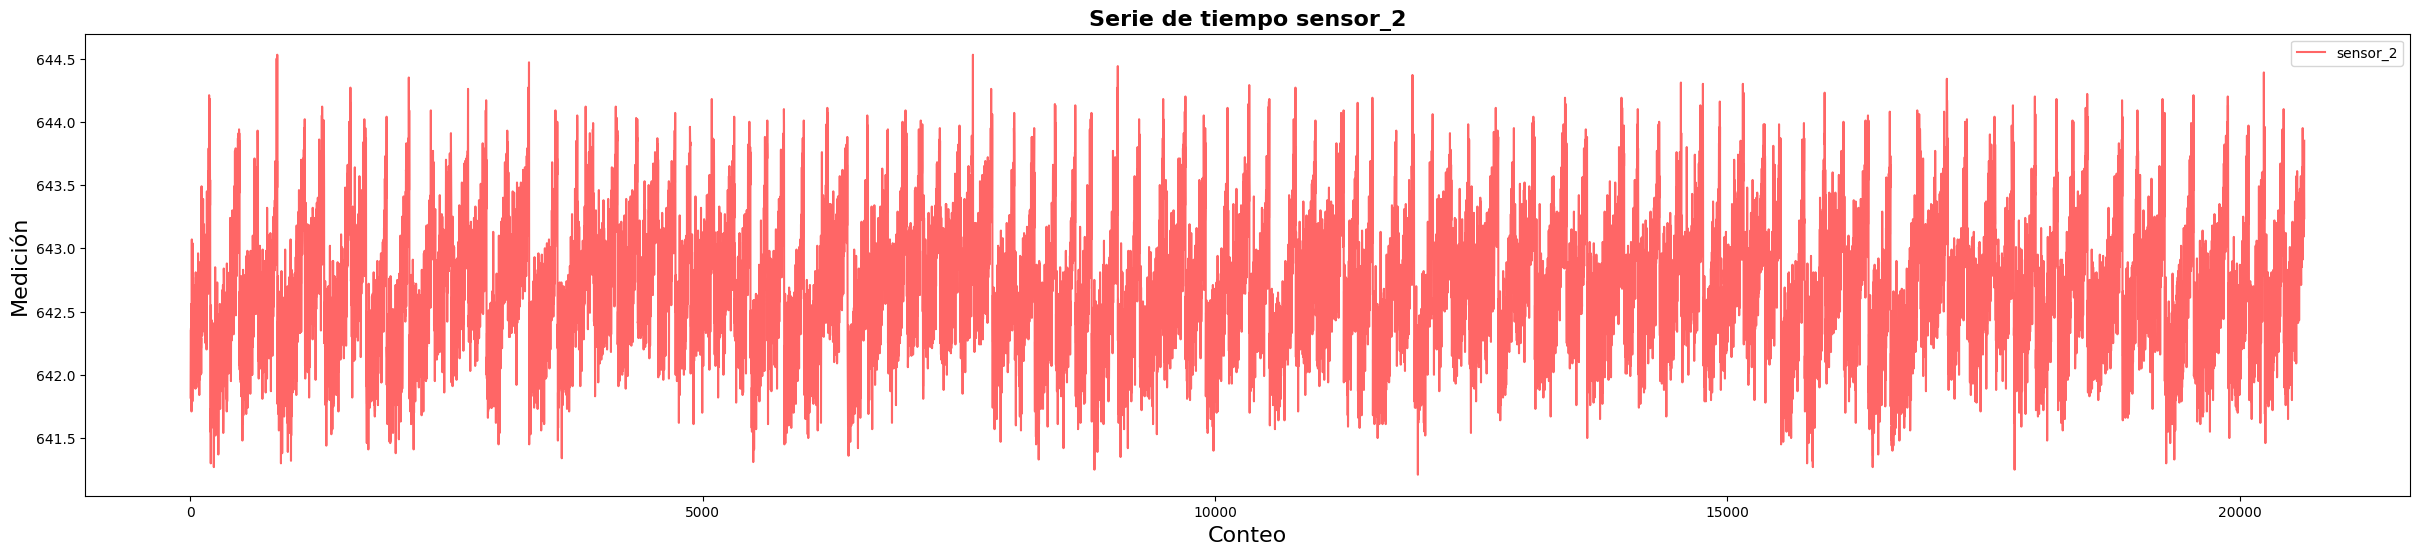

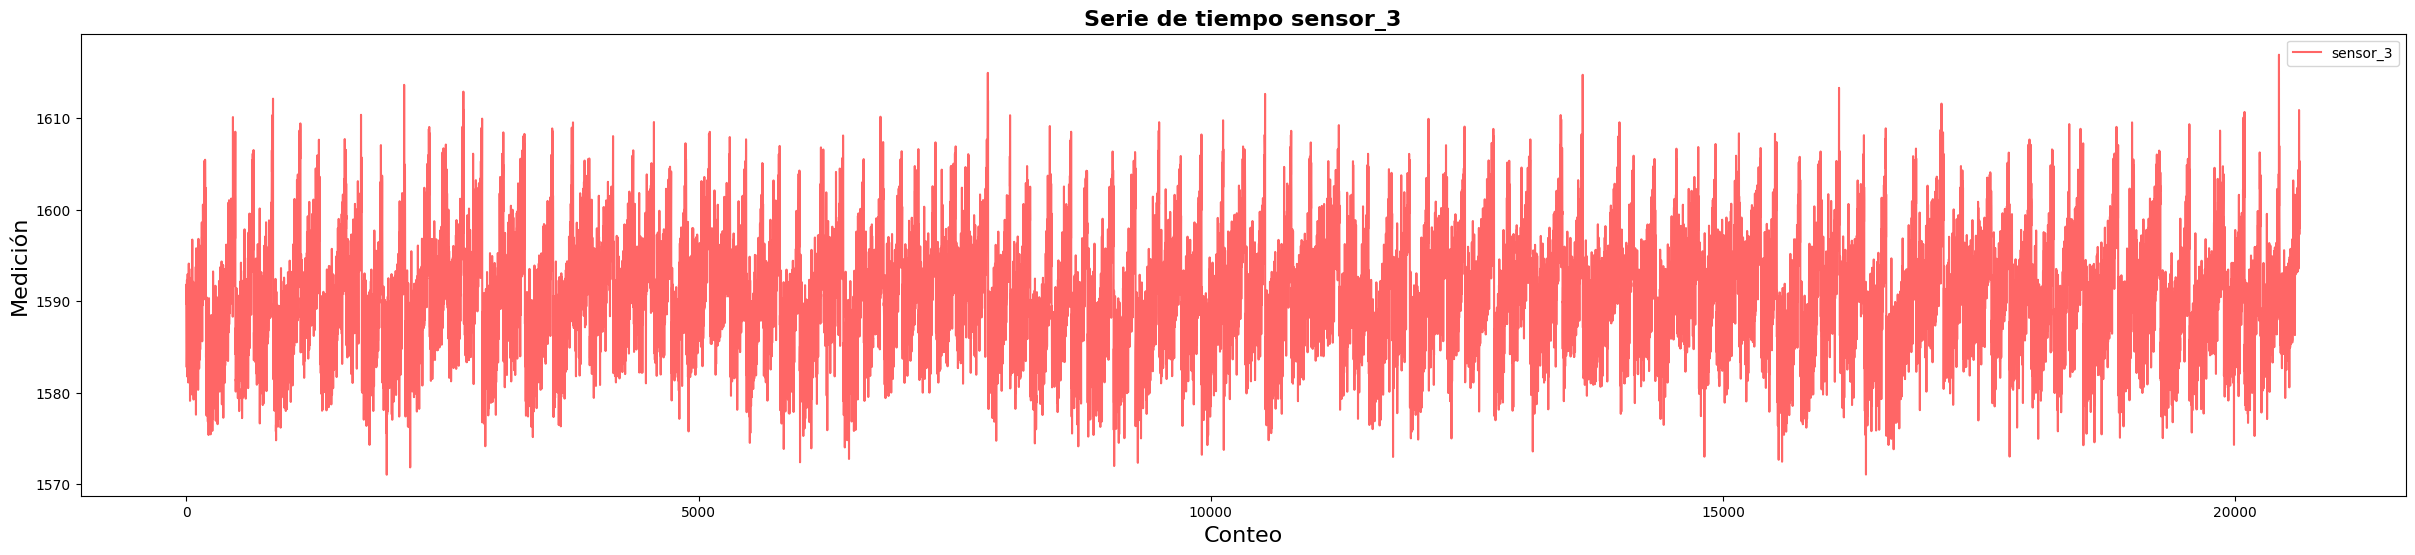

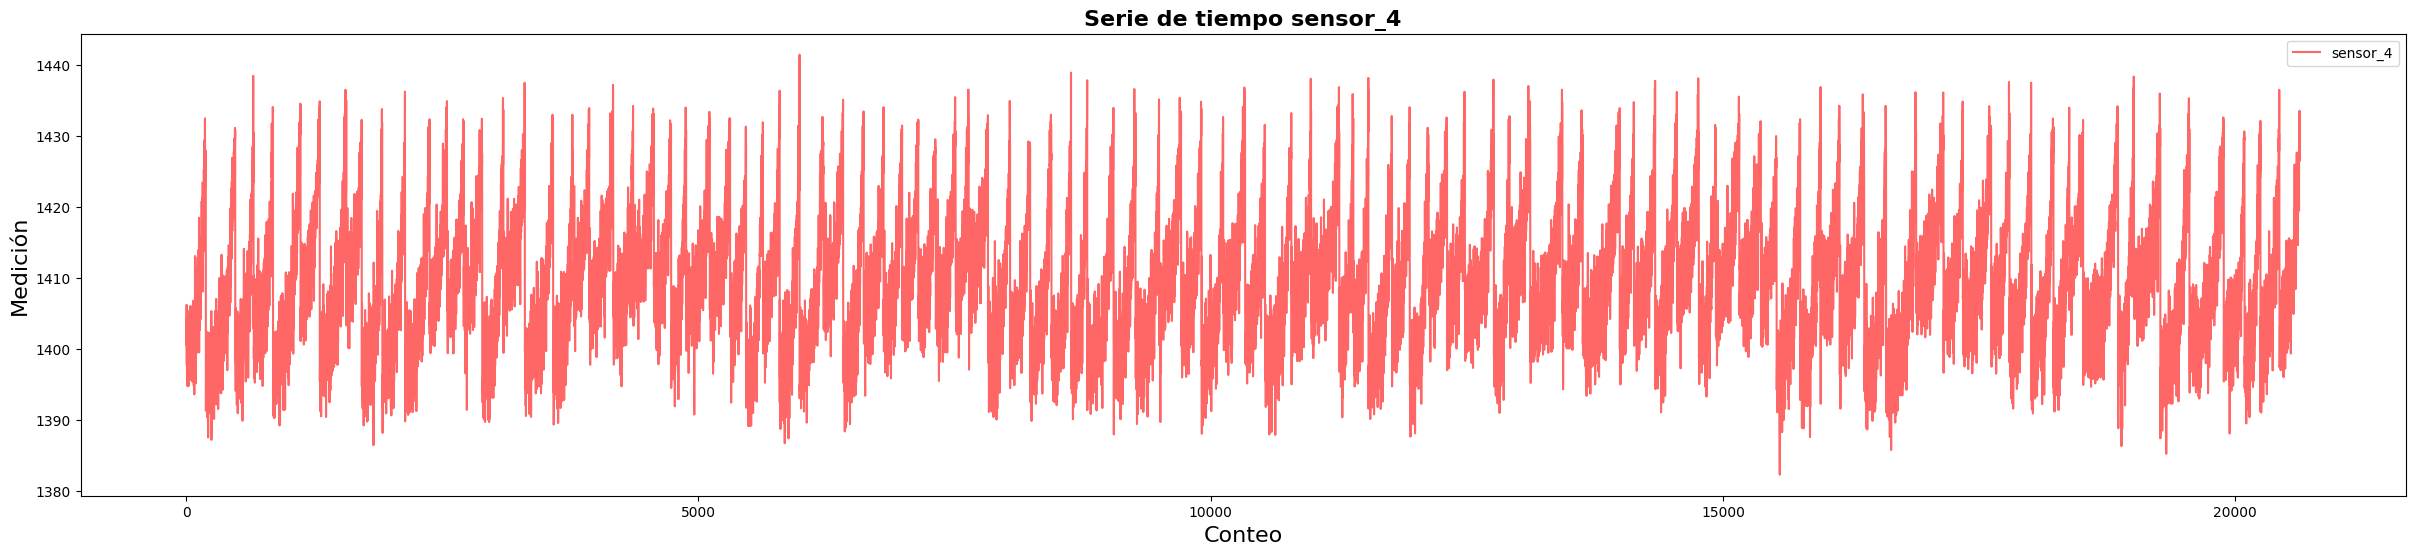

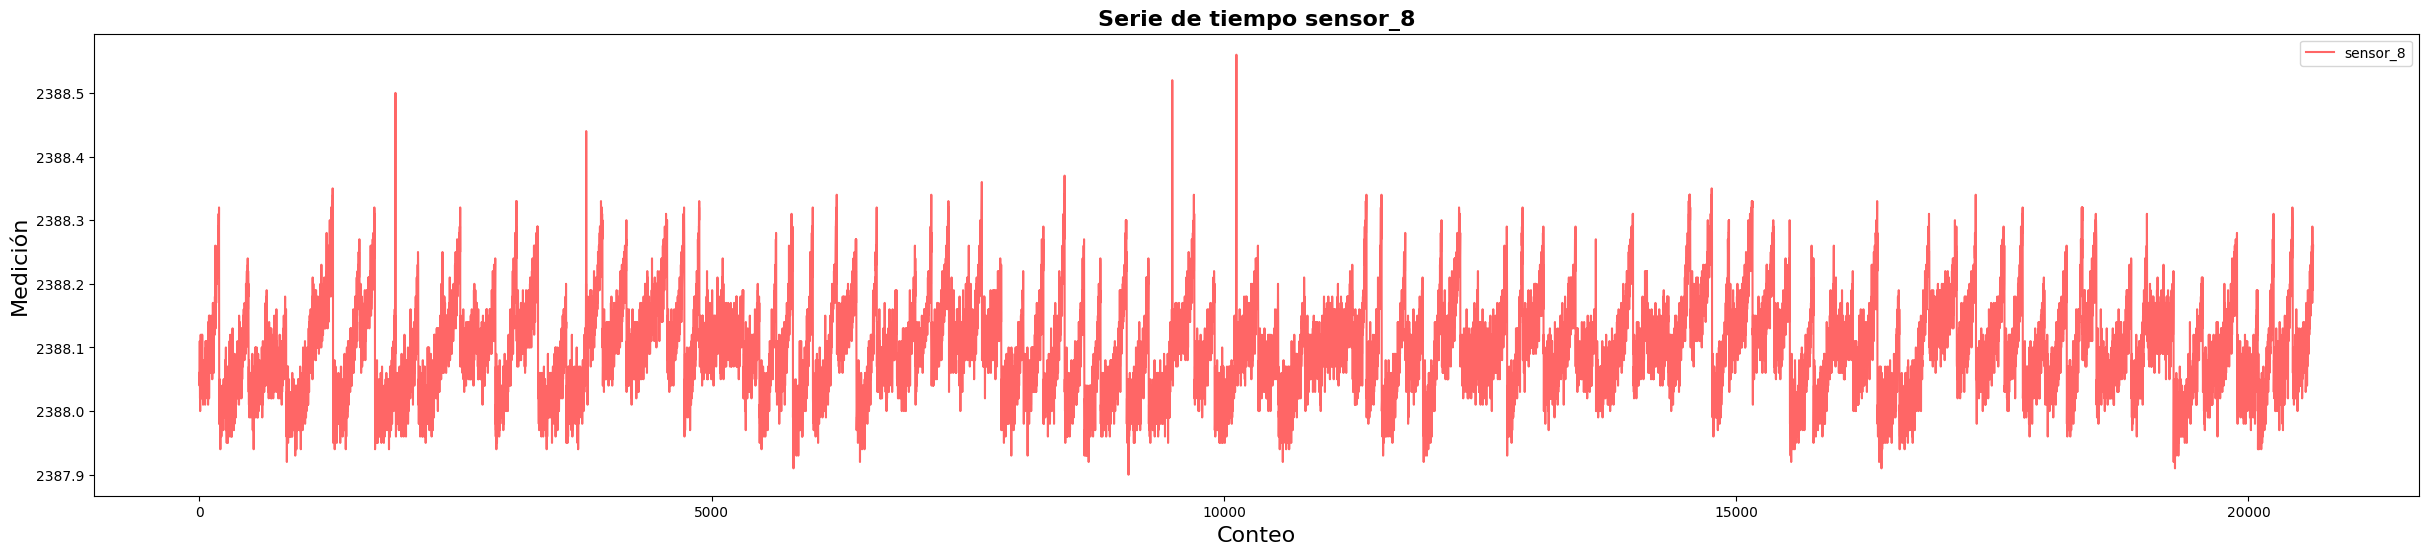

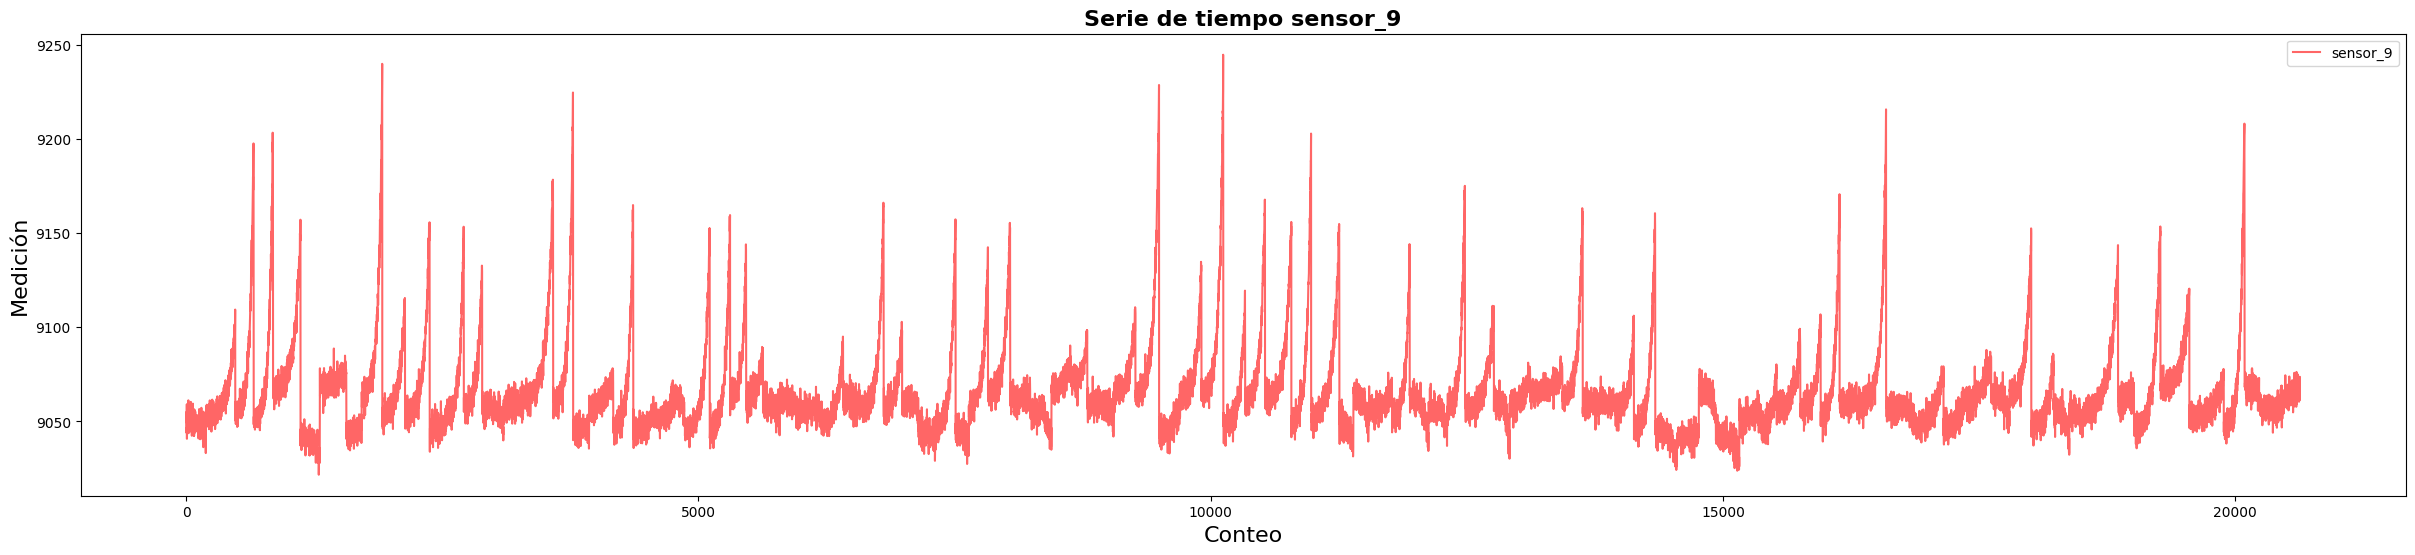

In [5]:
columnas = df.columns
sensores = columnas[1:]

for sensor in sensores:
    ax = df.plot(
        x='conteo',
        y=sensor,
        figsize=(30, 6),
        title=f'Serie del {sensor}',
        alpha = 0.6,
        color = 'red'
    )

    ax.set_xlabel('Conteo', fontsize=16)
    ax.set_ylabel('Medición', fontsize=16)
    ax.set_title(f'Serie de tiempo {sensor}', fontsize=16, fontweight='bold')
    plt.savefig(f"img/1_{sensor}.png")
    plt.show()

# 3 Tendencia

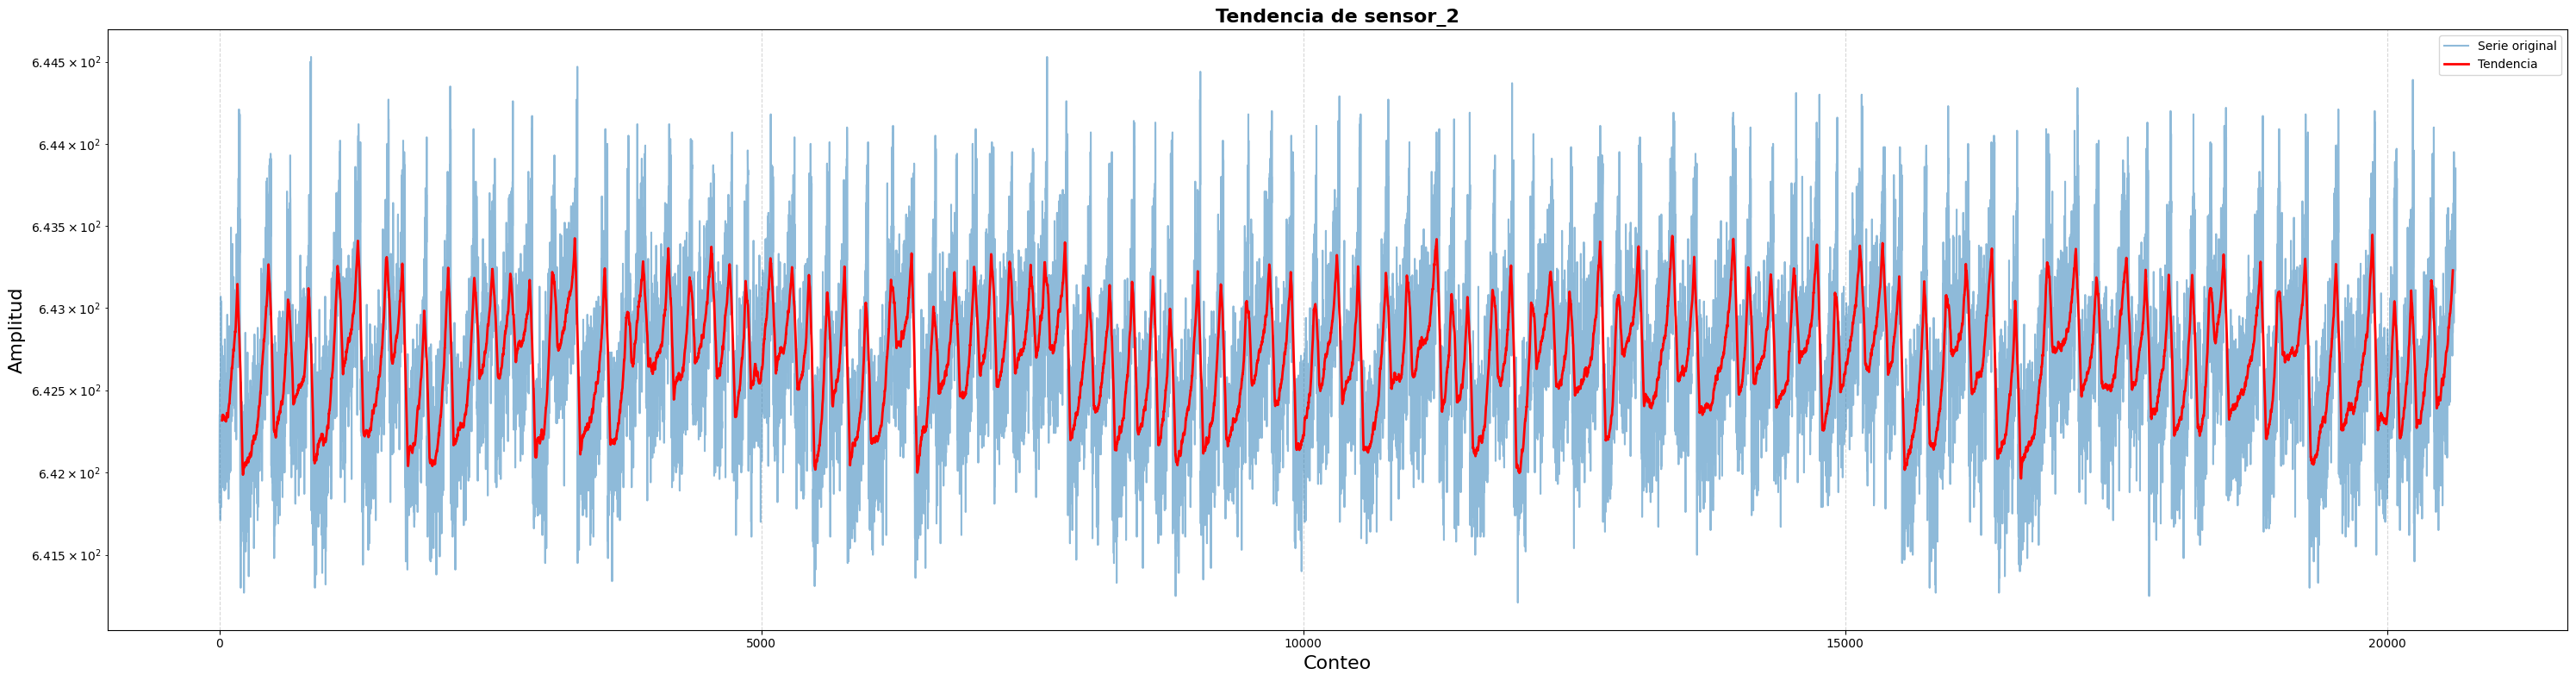

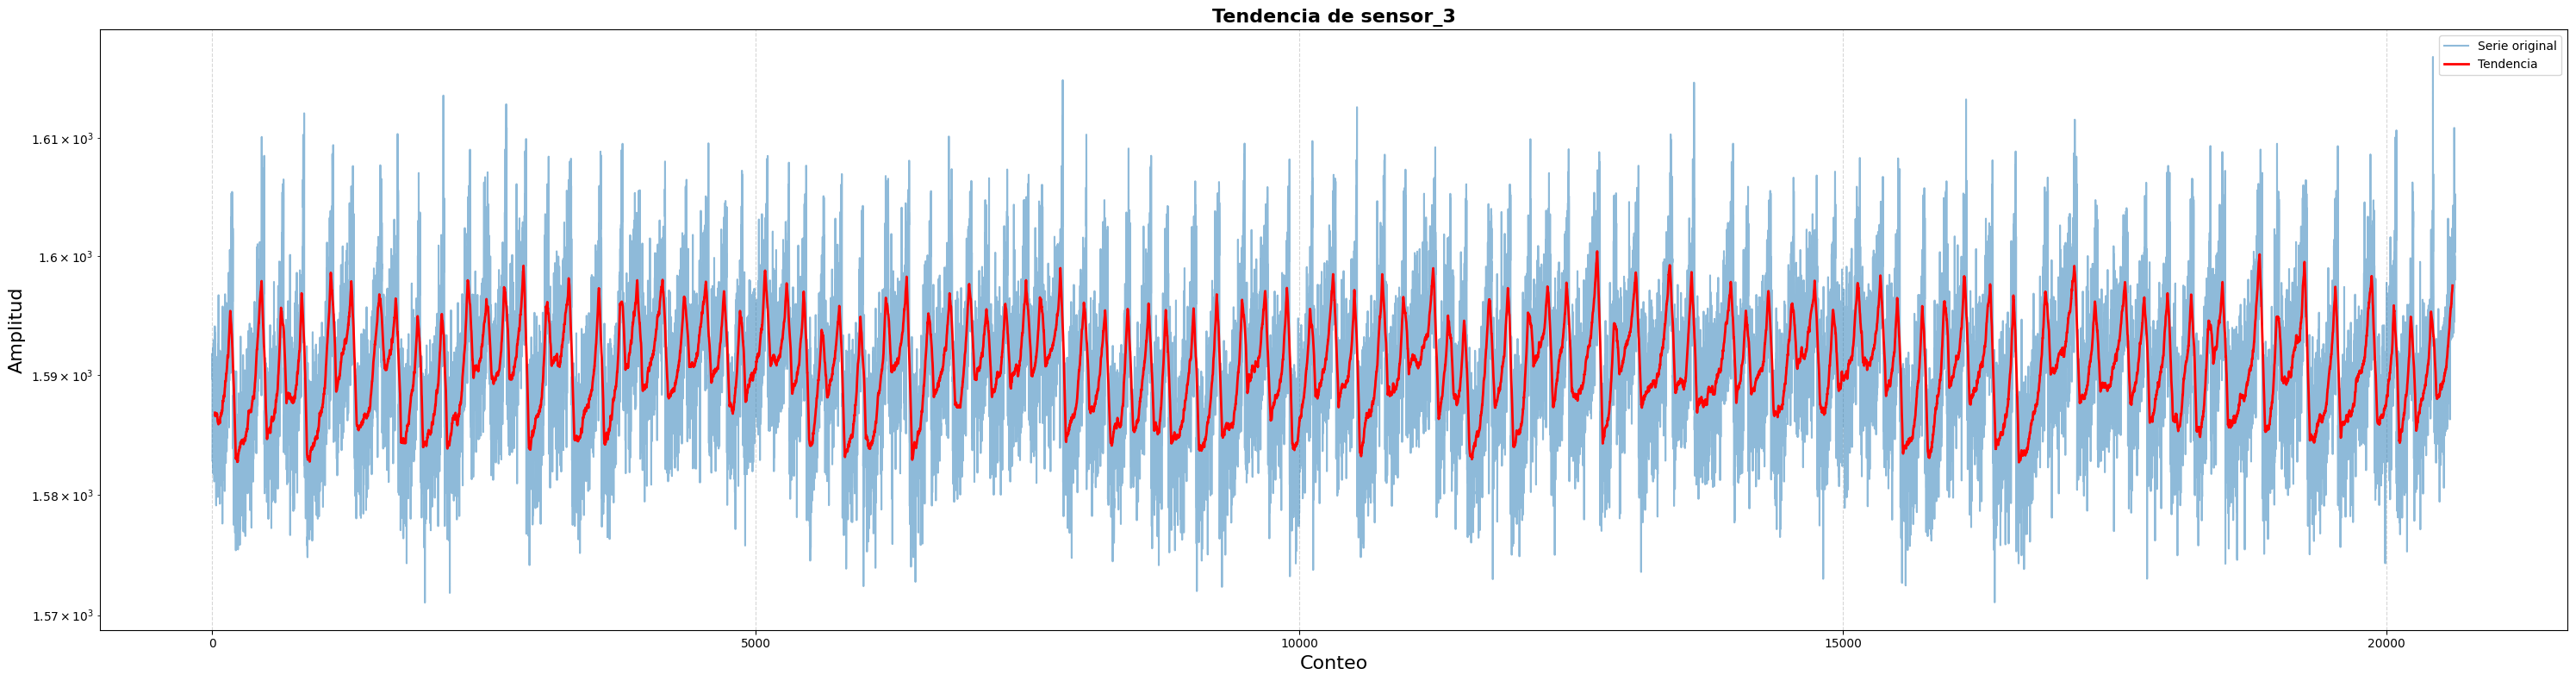

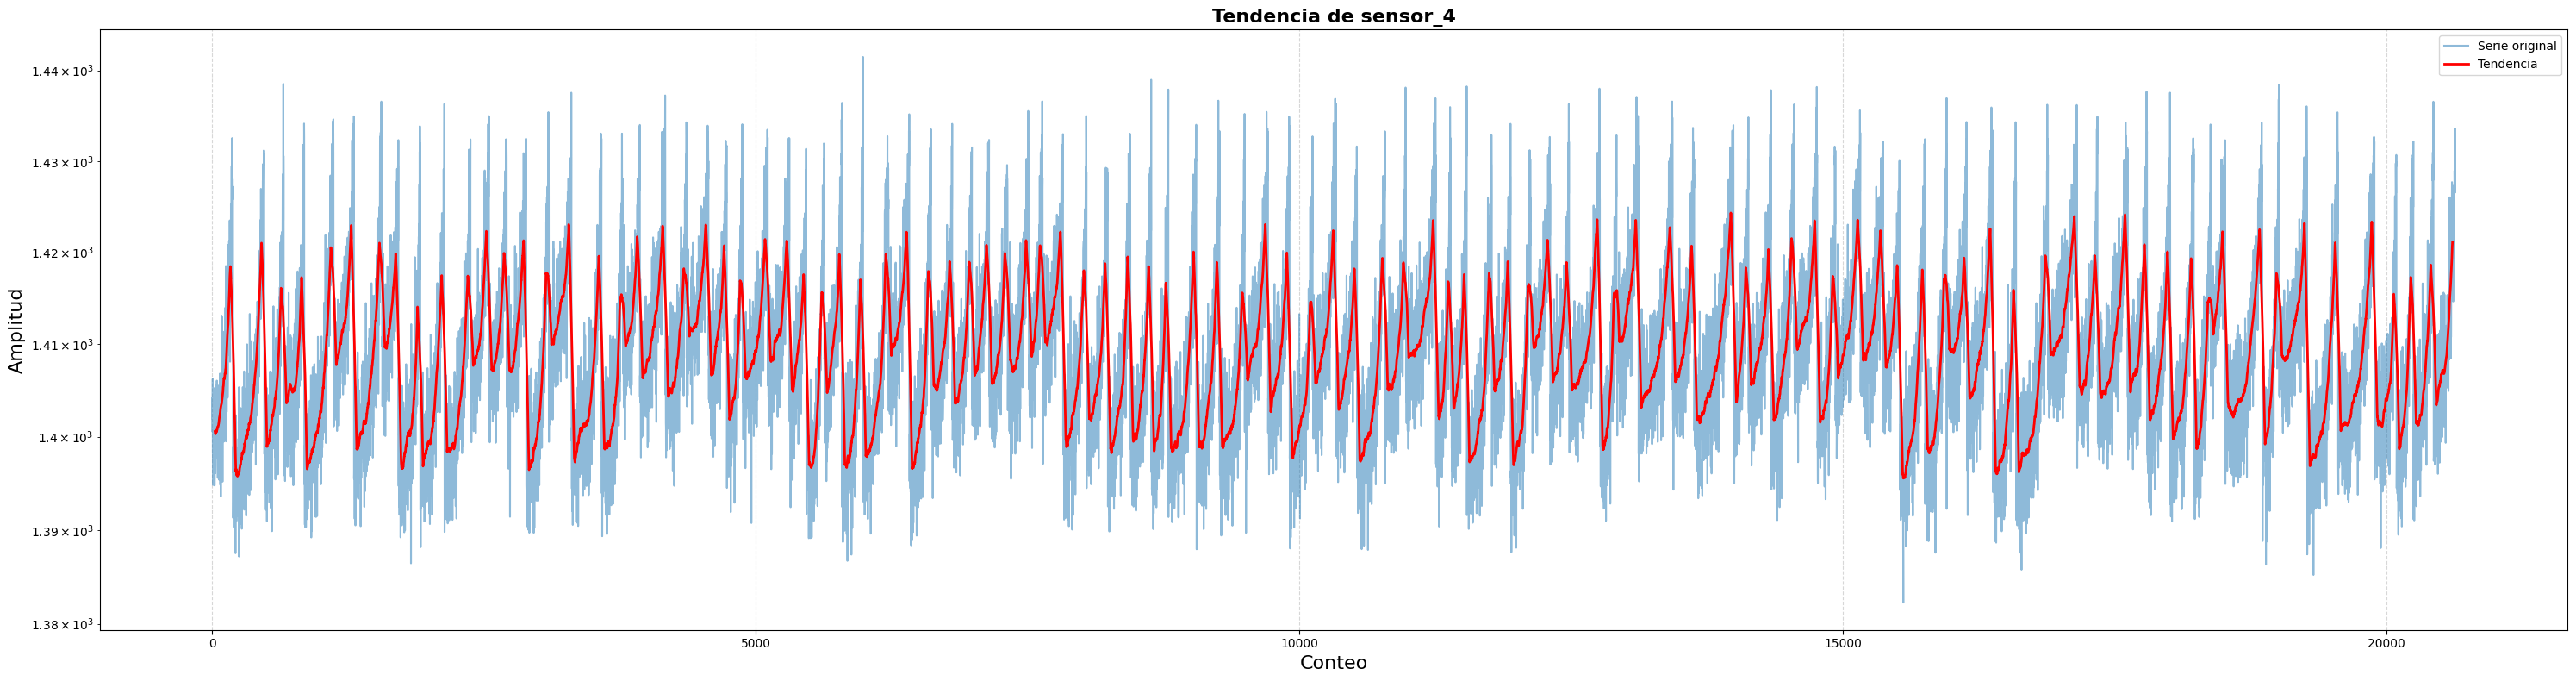

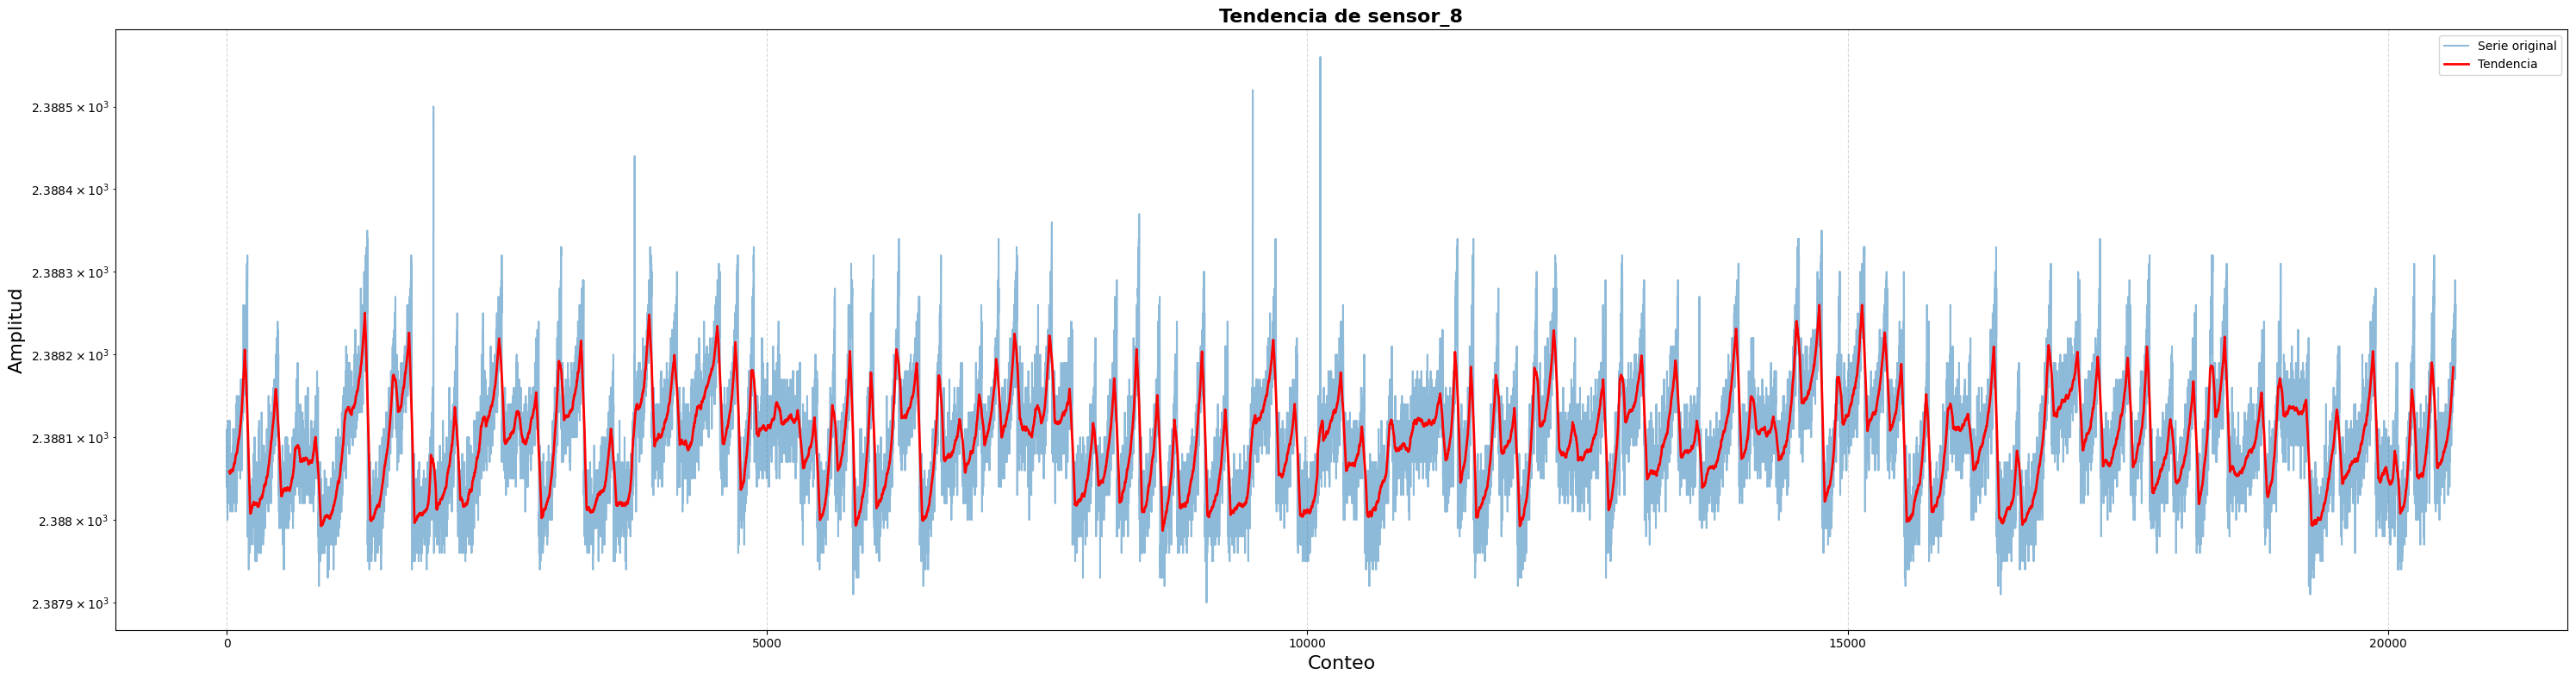

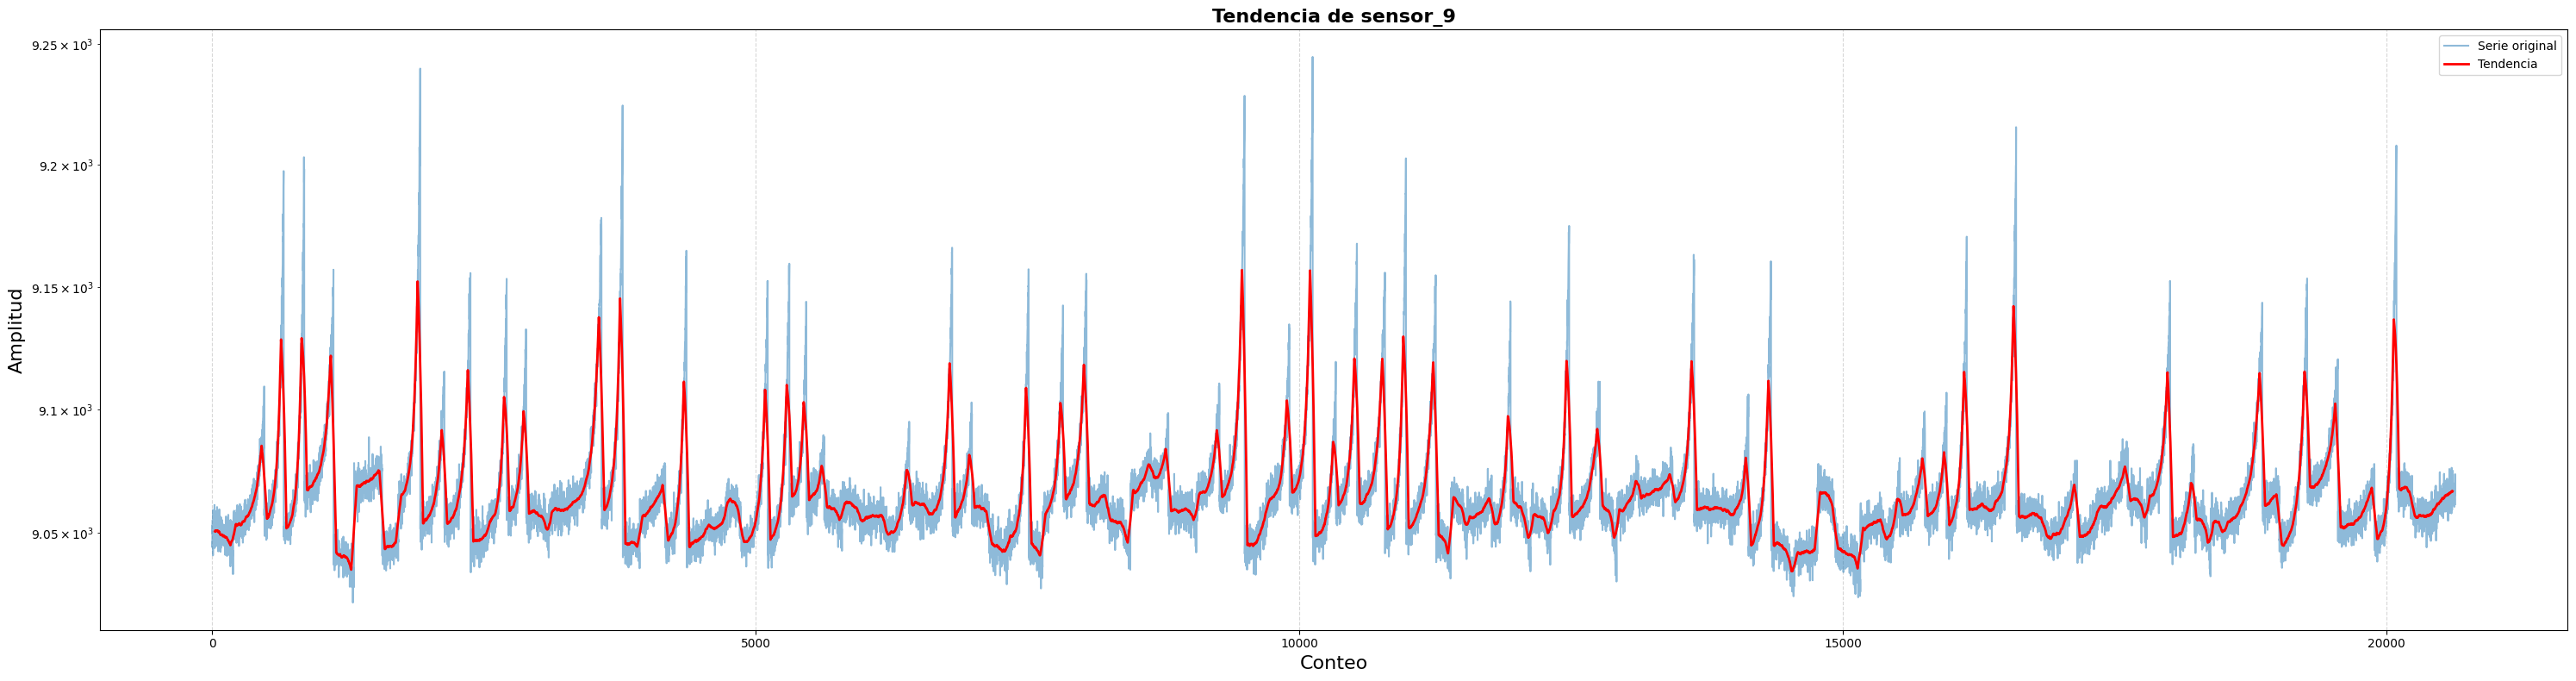

In [6]:
for sensor in sensores:
    tendencia(sensor, df, 50, 'additive')

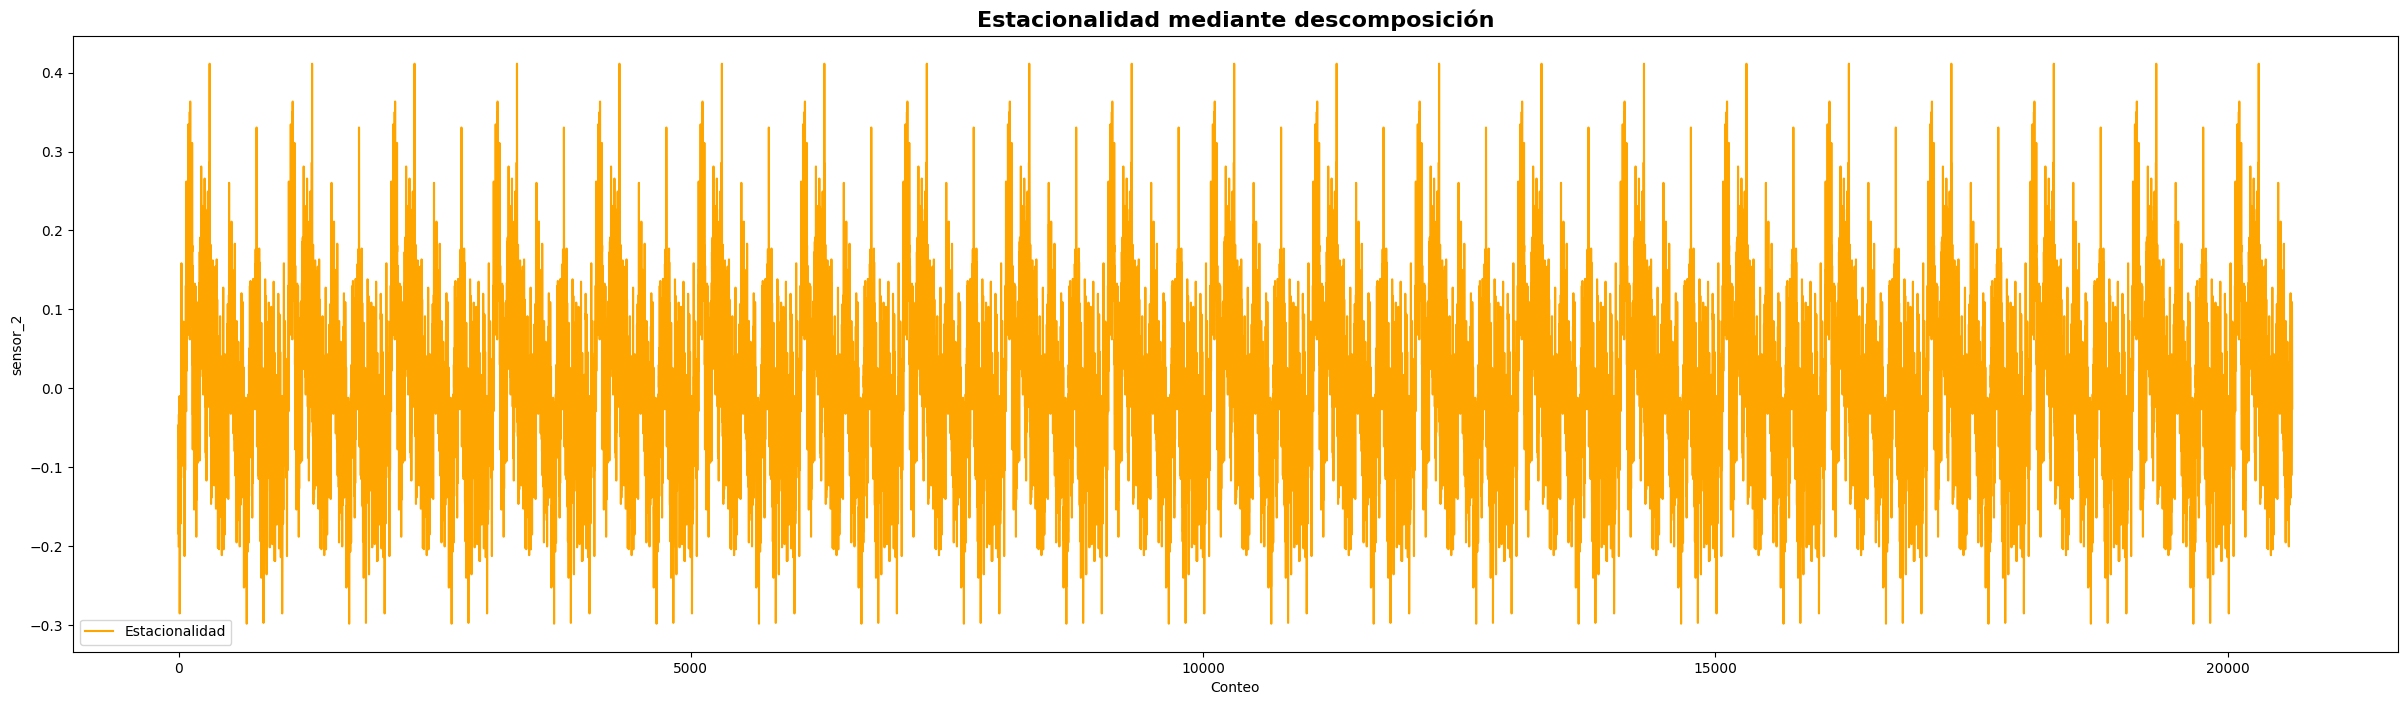

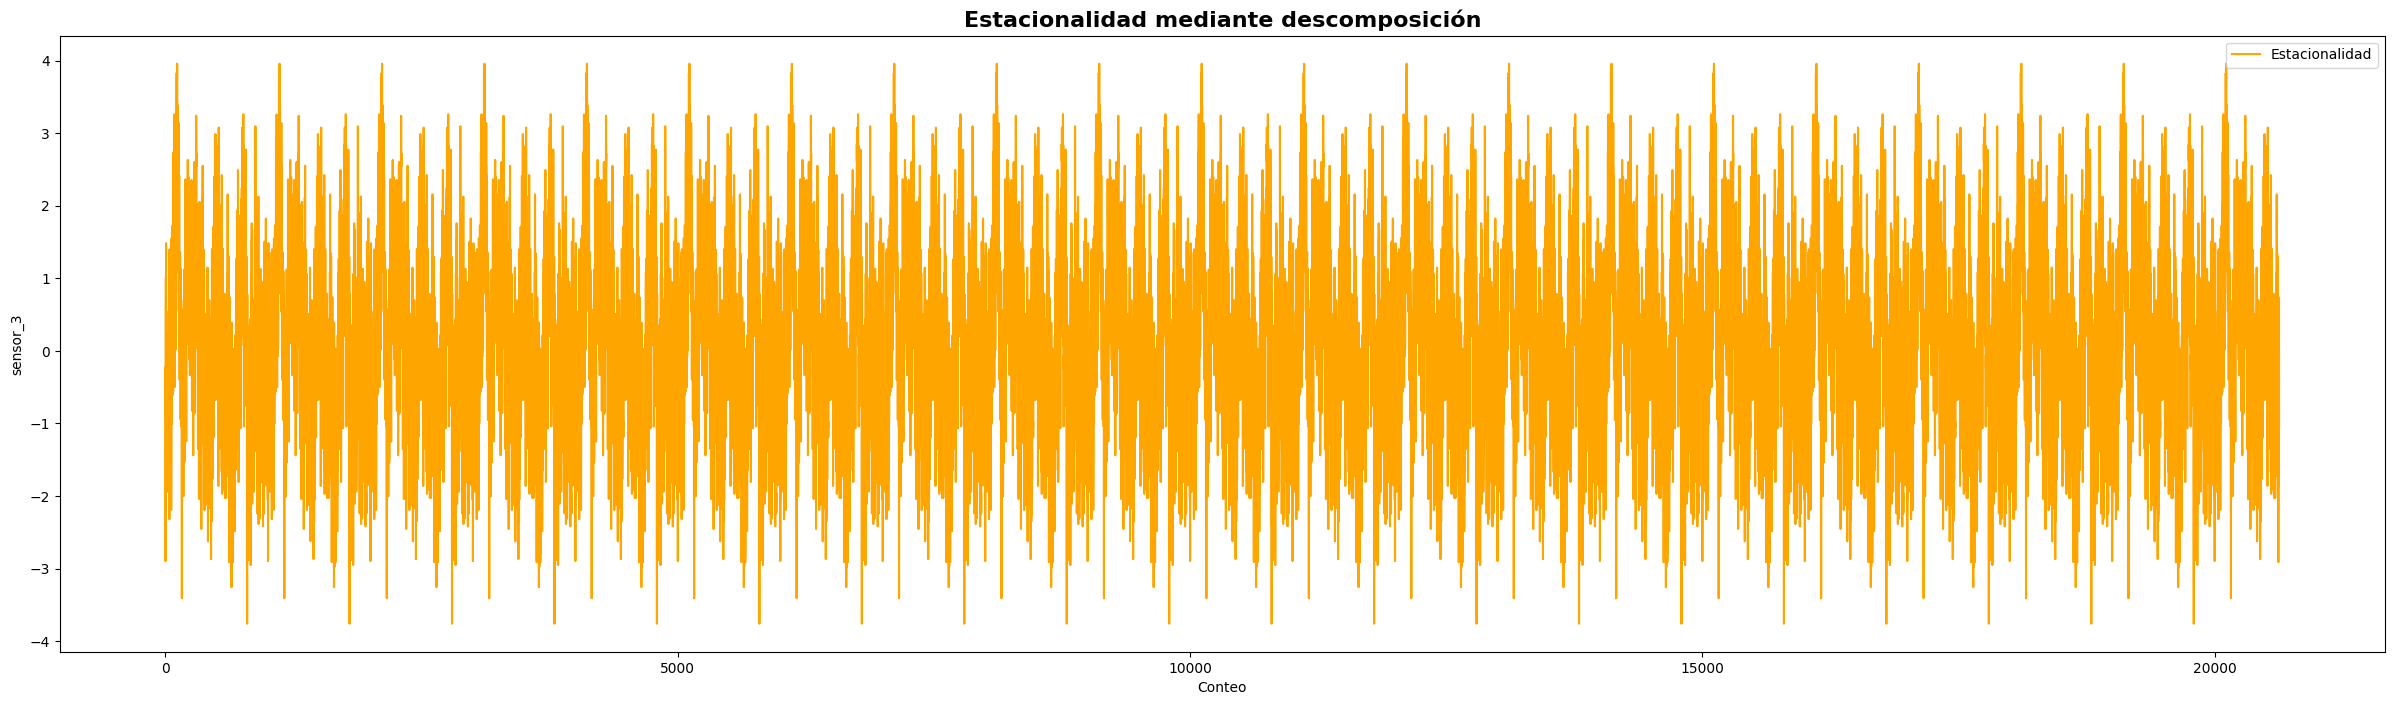

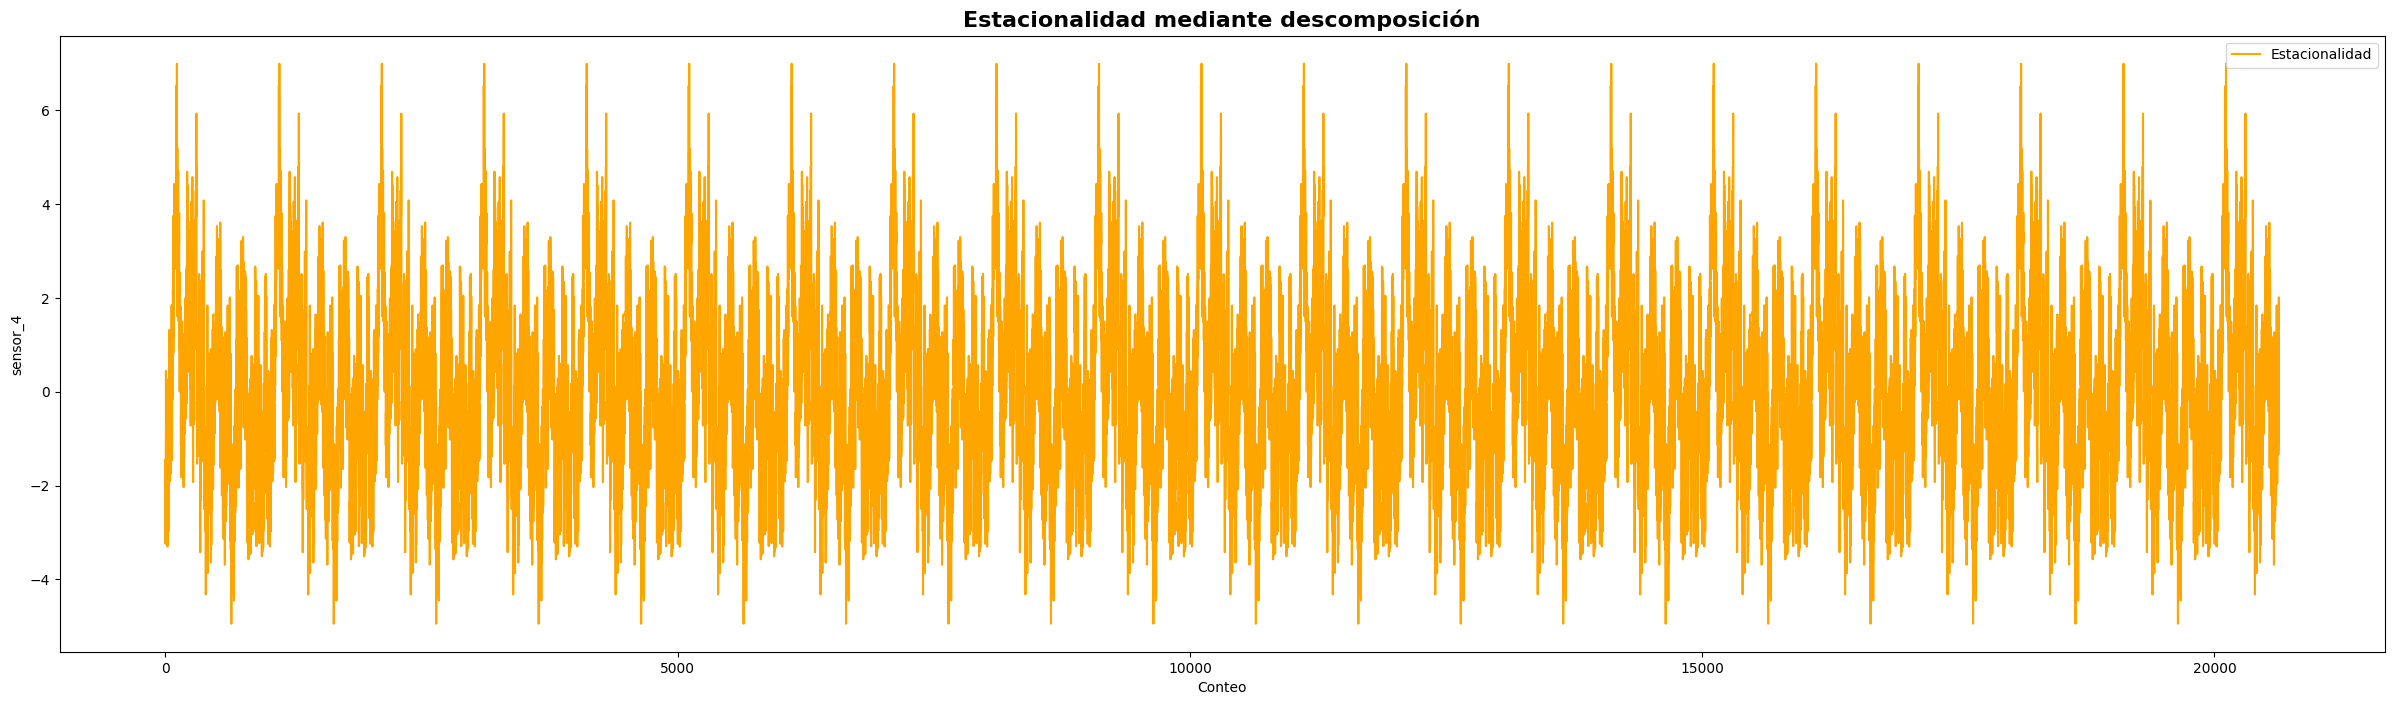

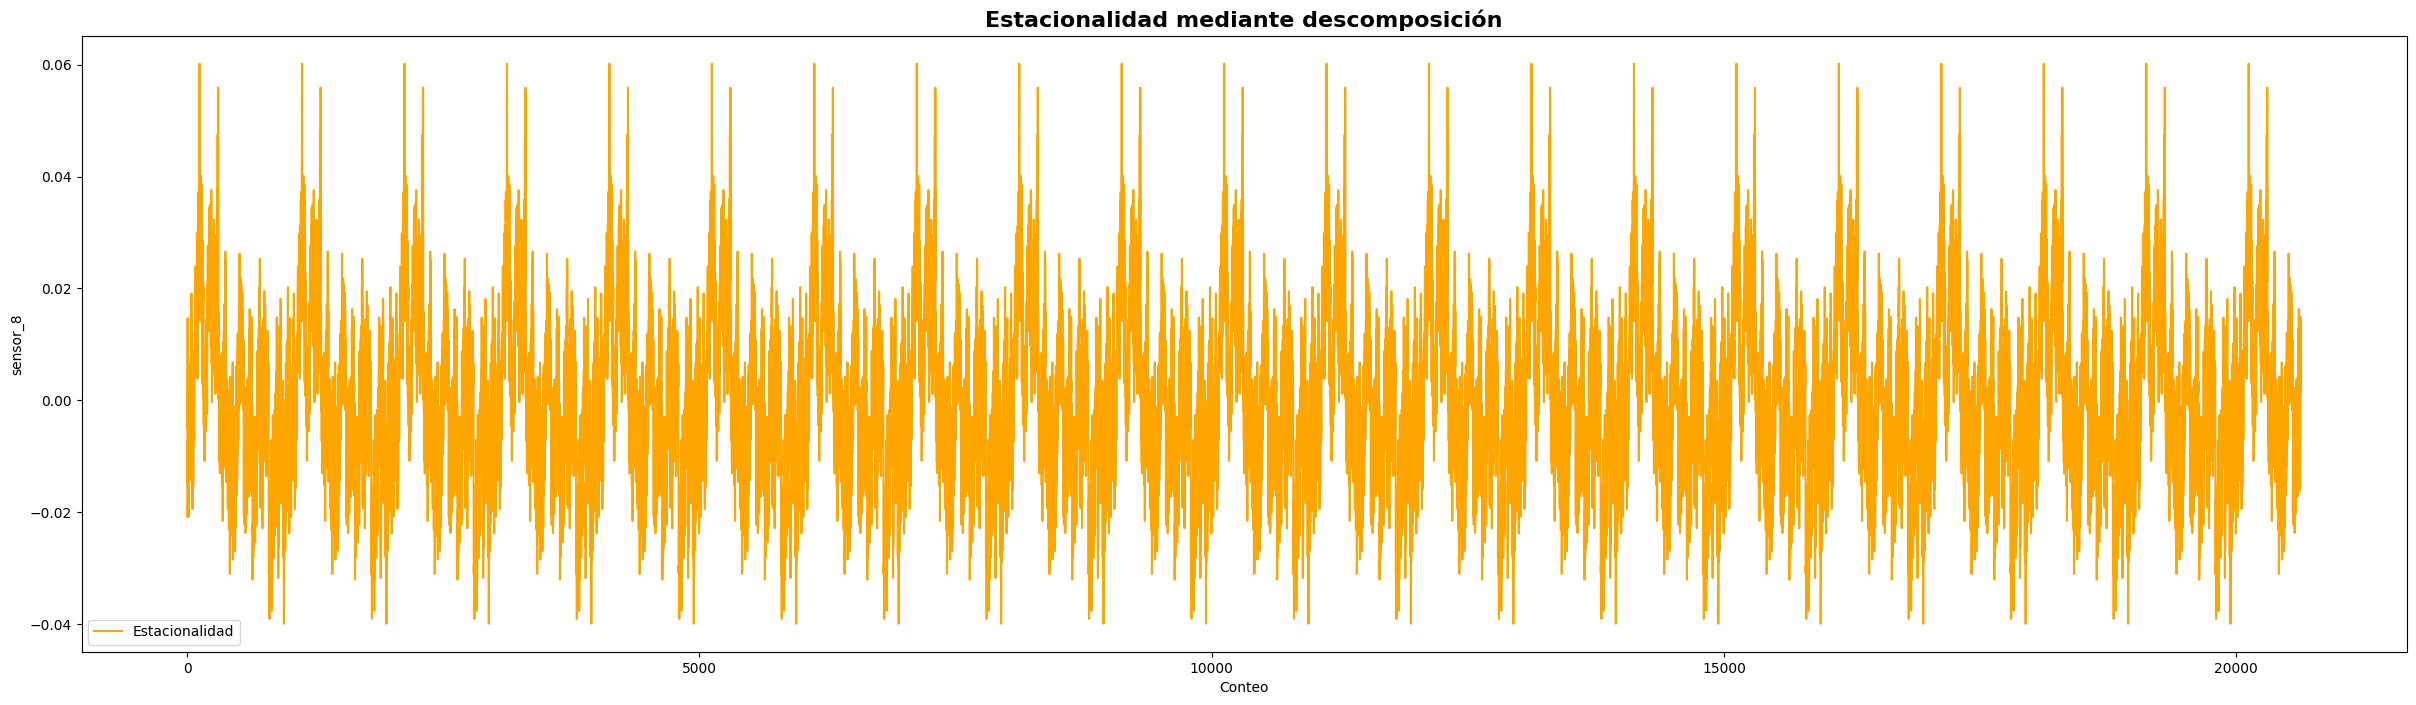

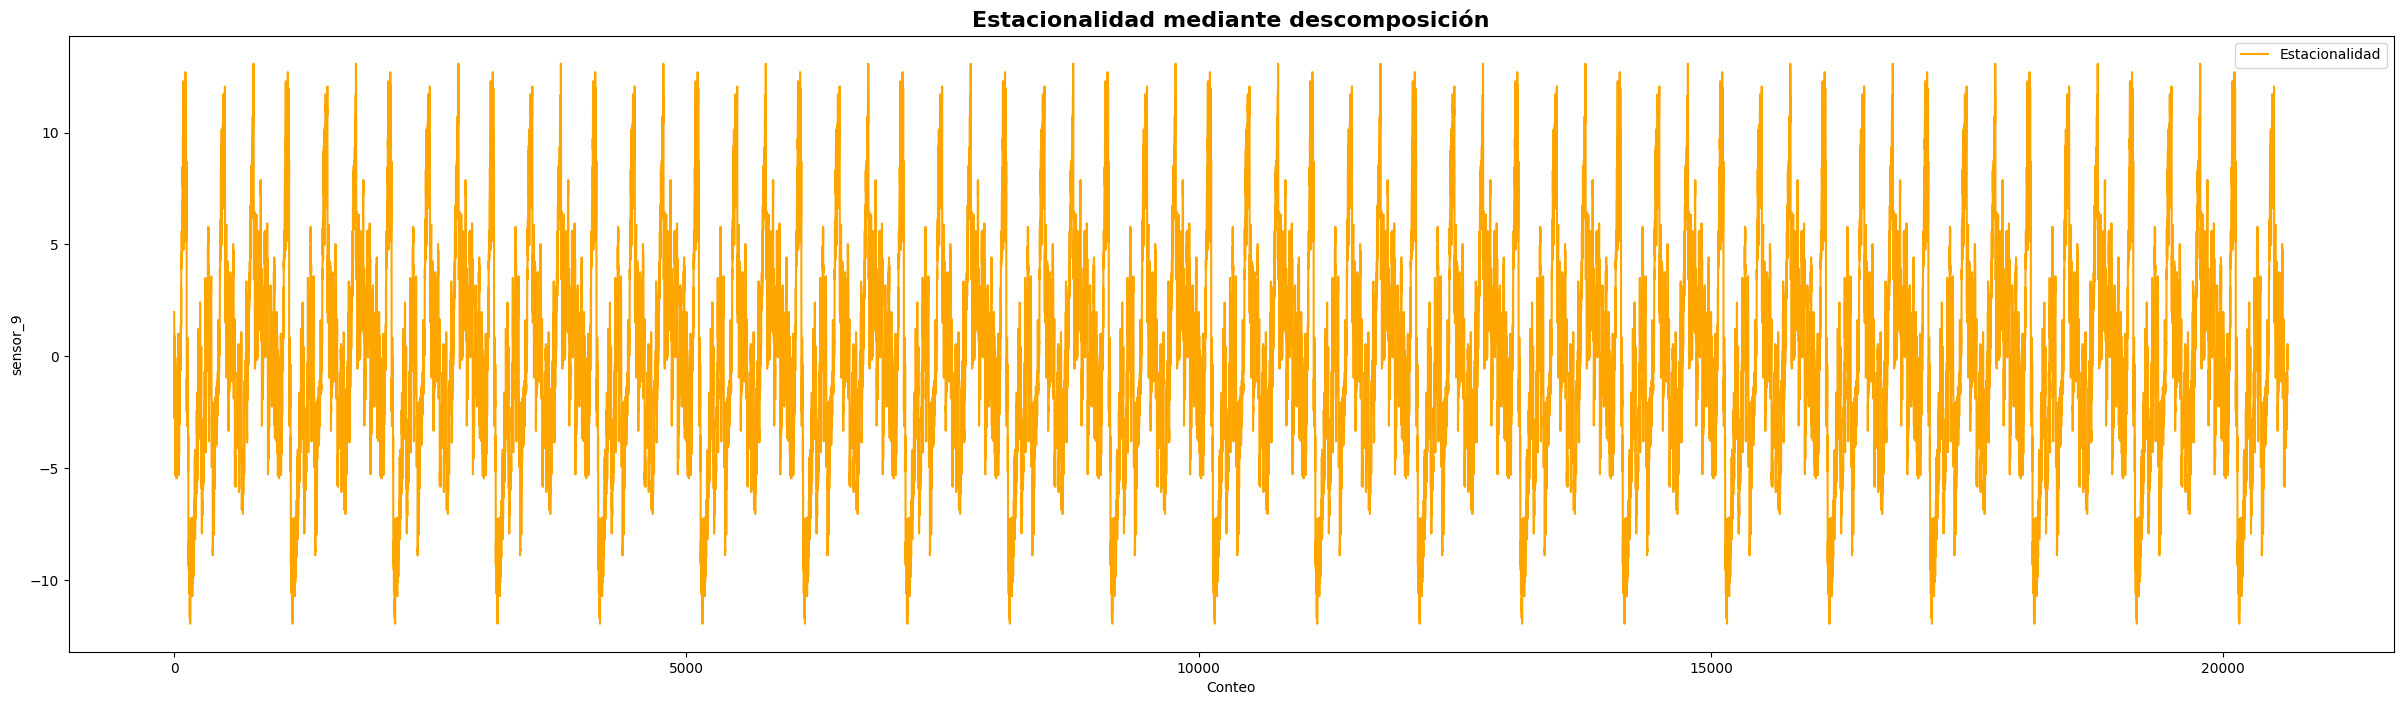

In [7]:
for sensor in sensores:
    estacionalidad(sensor, df, 1000, 'additive')

# 4 Escala logarítmica

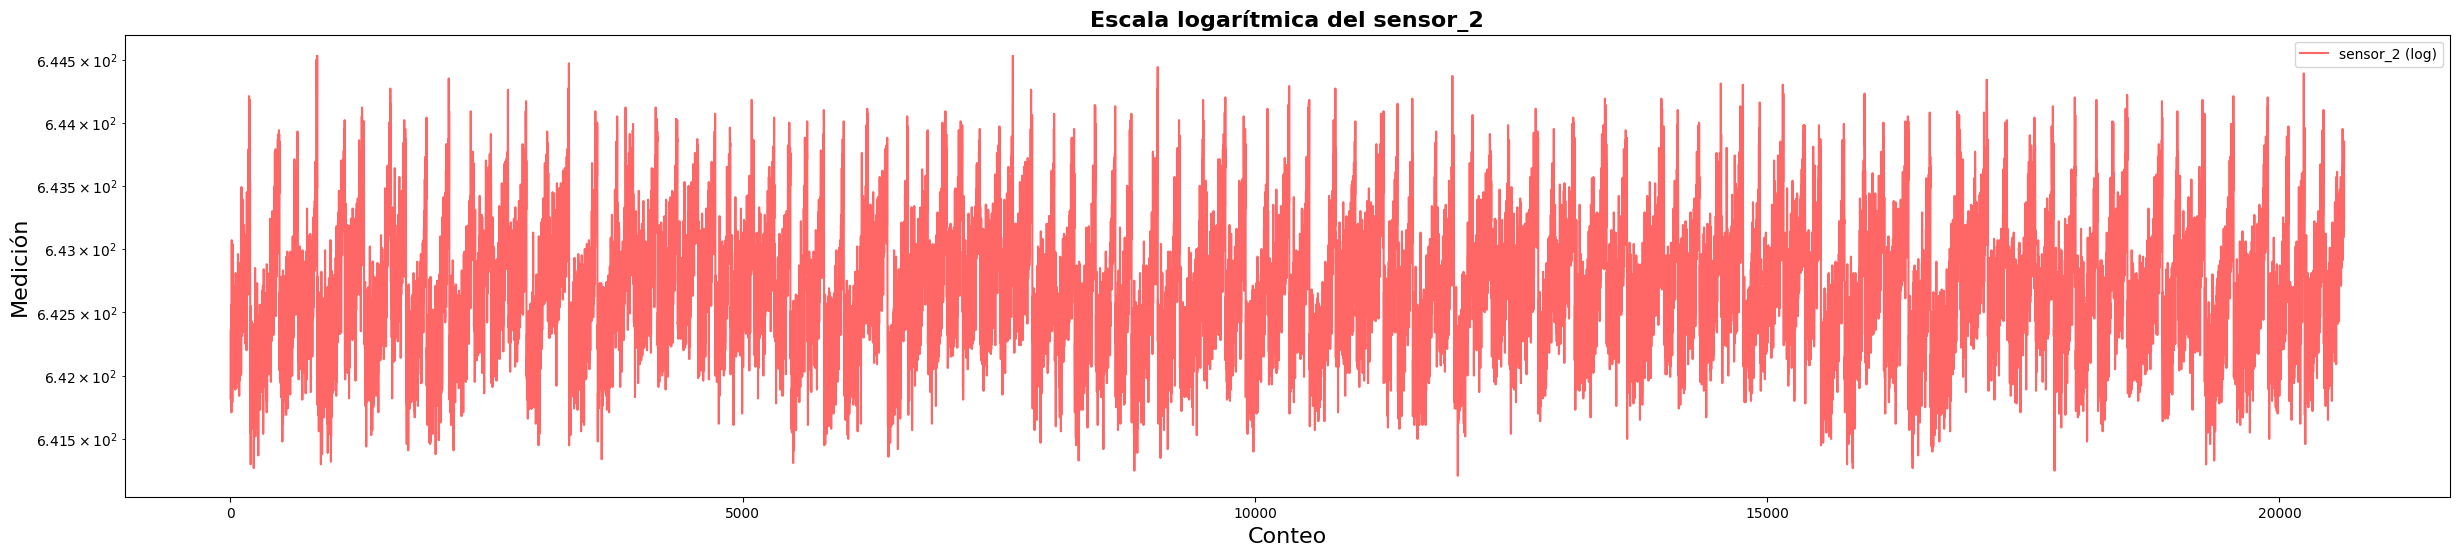

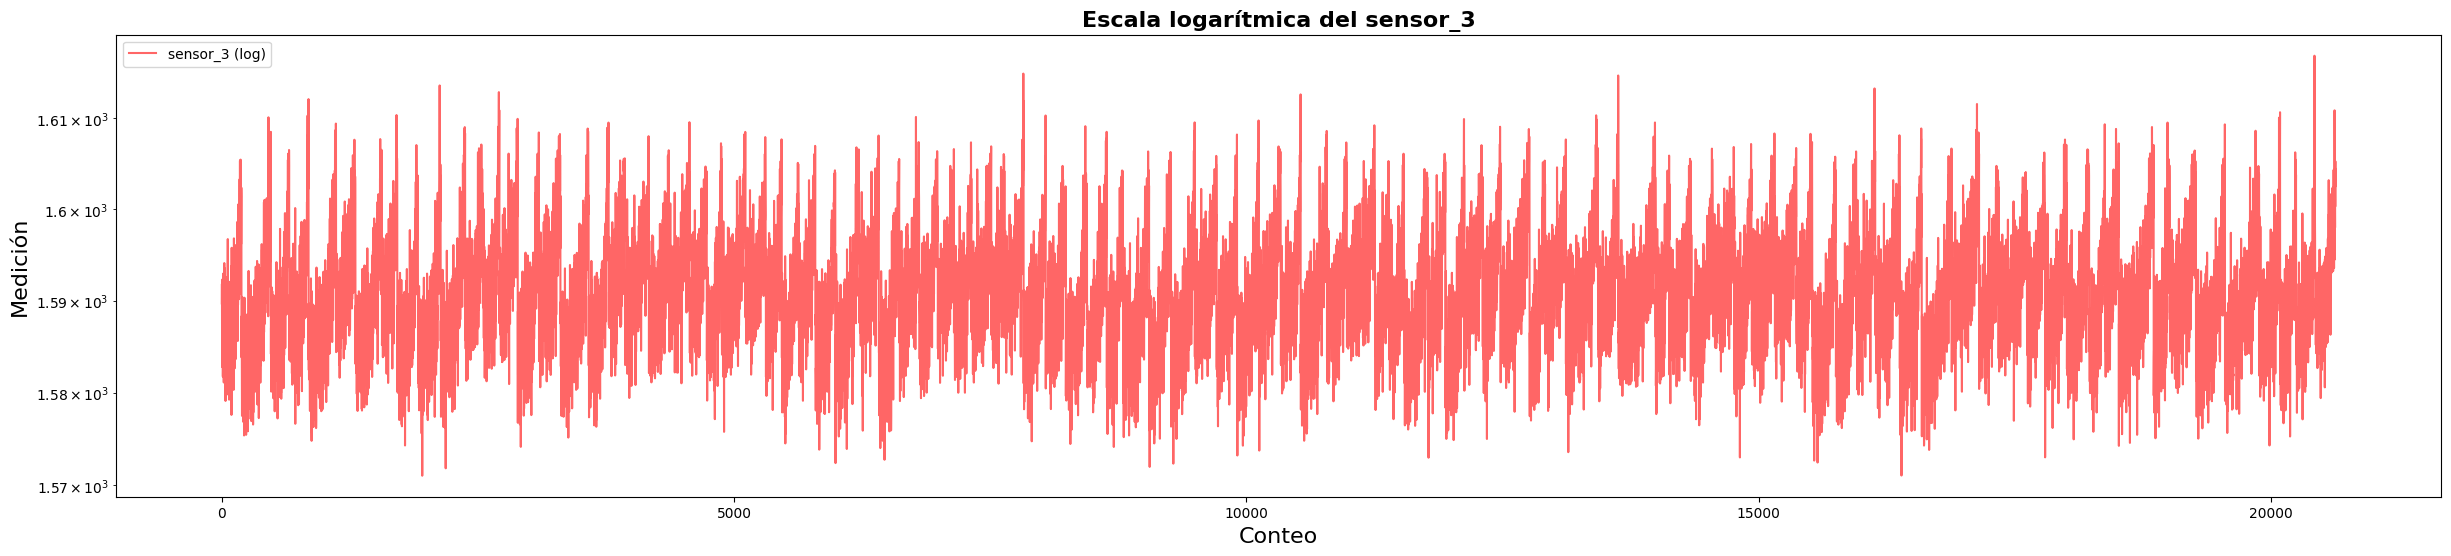

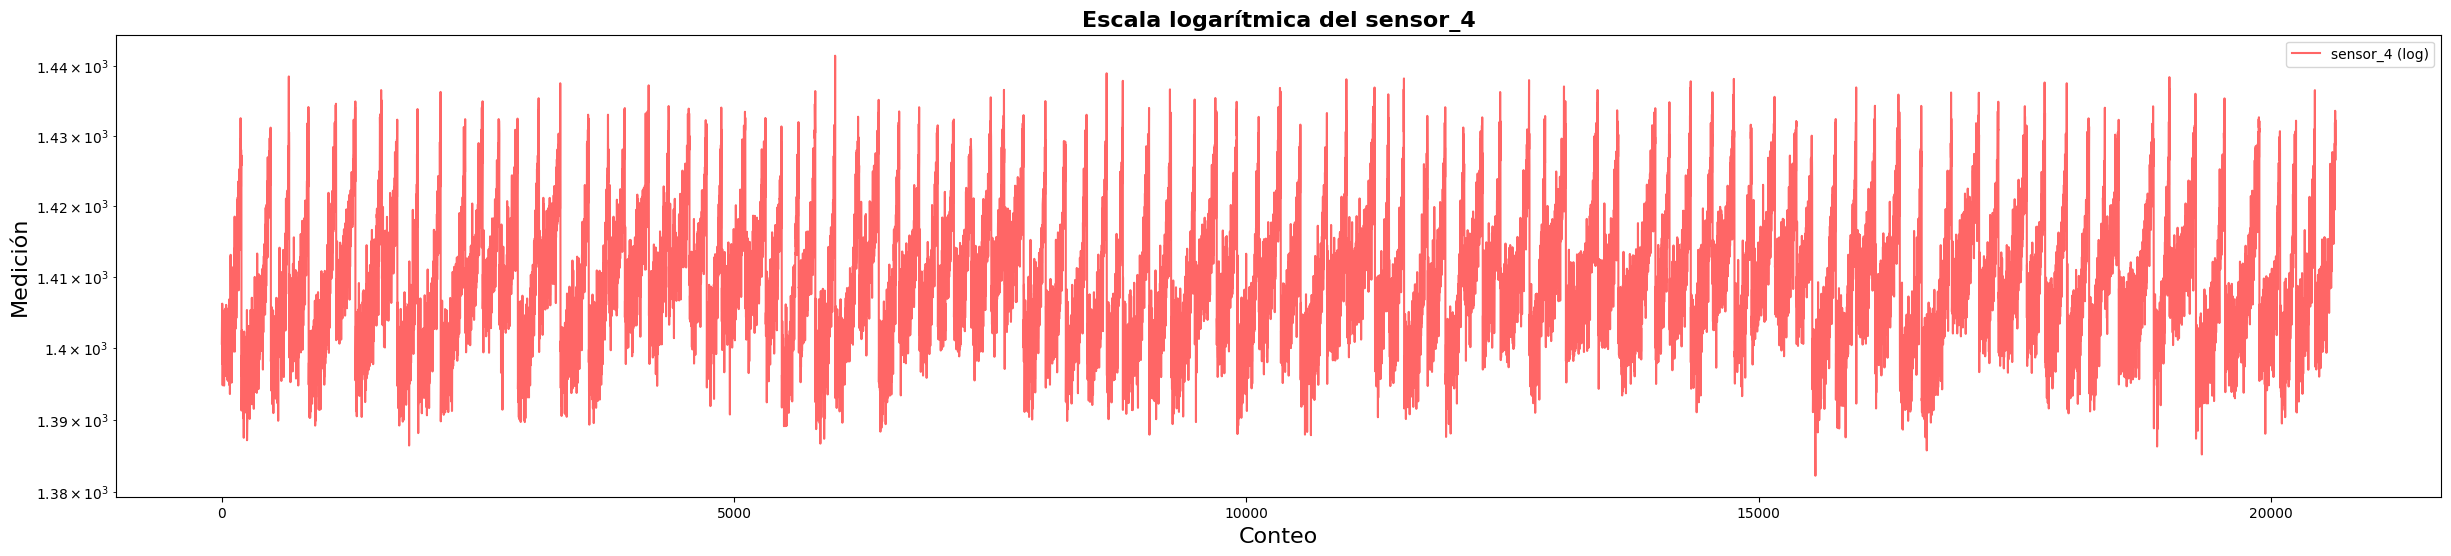

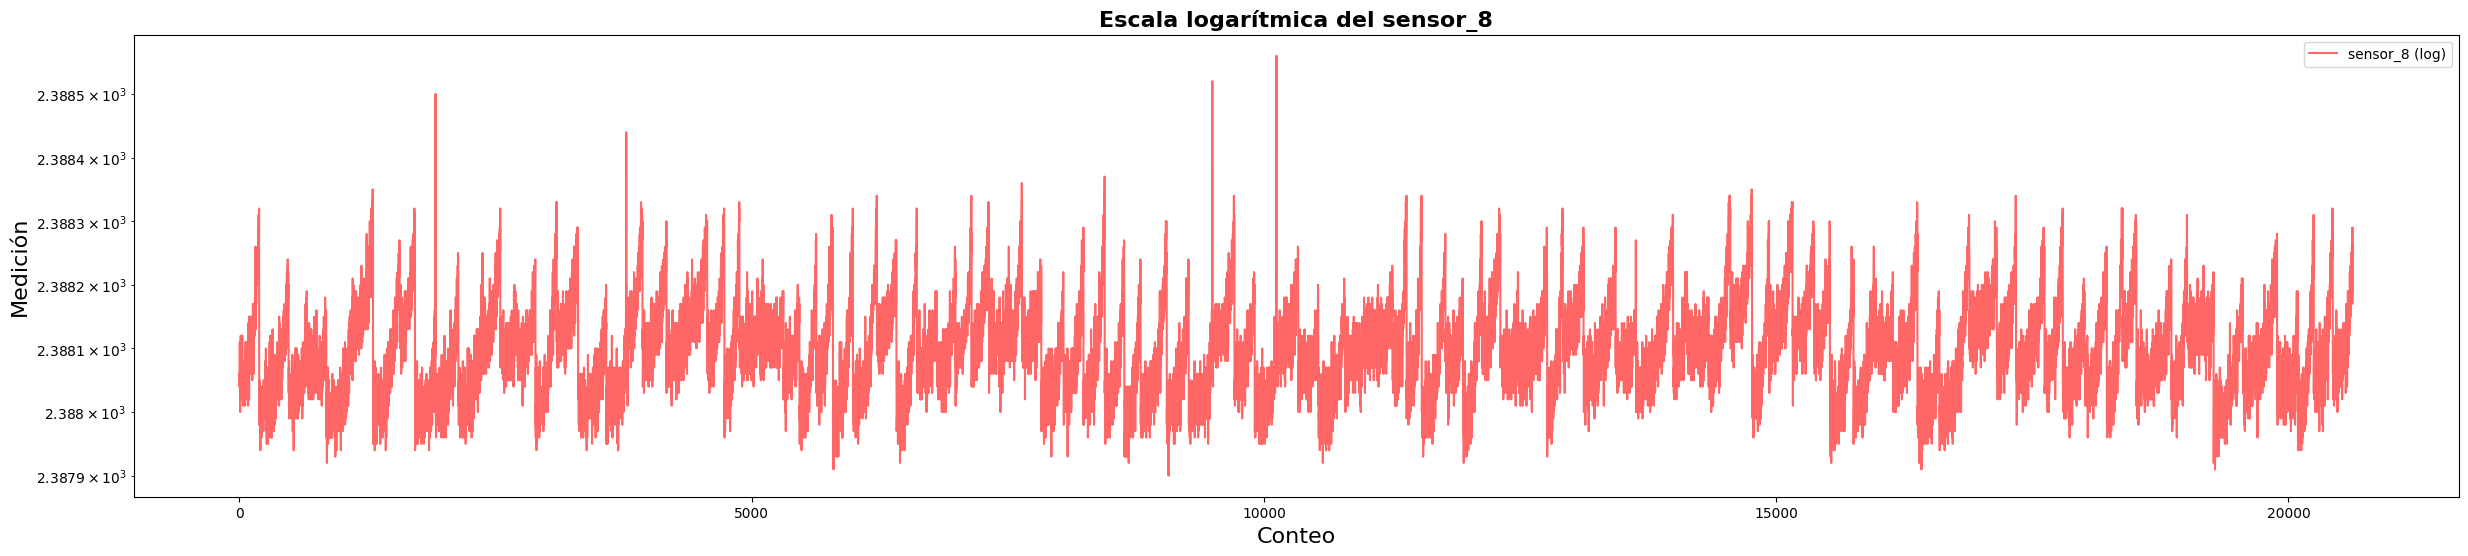

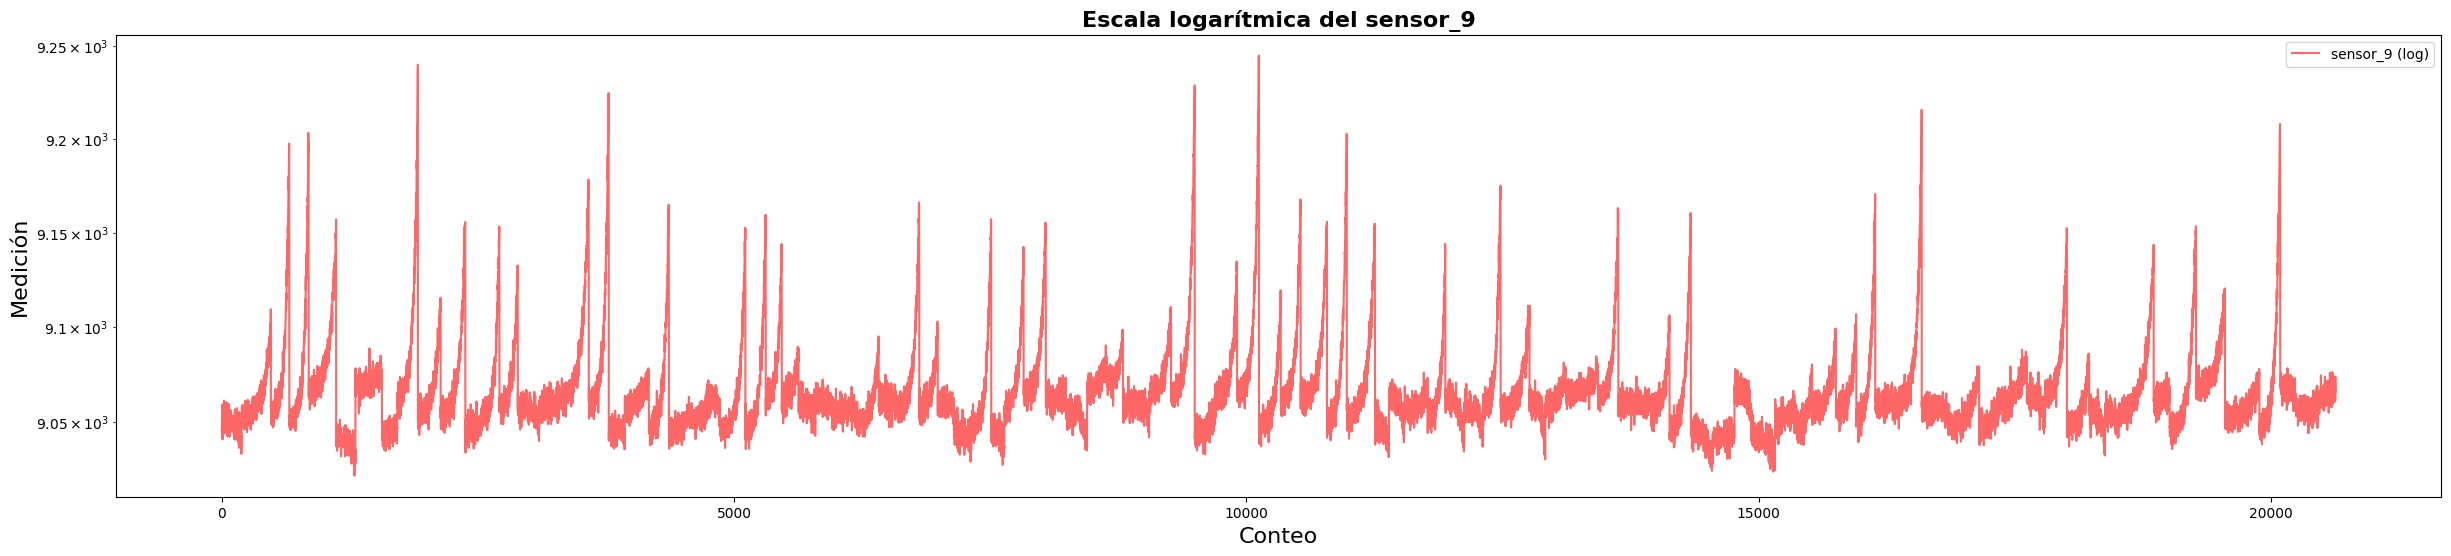

In [8]:
for sensor in sensores: 
    fig, ax = plt.subplots(figsize=(30, 6))

    # Serie en escala logarítmica
    ax.plot(
        df['conteo'],
        df[sensor],
        label=f'{sensor} (log)',
        color = 'red',
        alpha = 0.6
    )

    ax.set_xlabel('Conteo', fontsize=16)
    ax.set_ylabel('Medición', fontsize=16)
    ax.set_yscale('log')
    ax.set_title(f'Escala logarítmica del {sensor}', fontsize=16, fontweight='bold')
    ax.legend()

    plt.savefig(f"img/4_{sensor}.png")
    plt.show()


# 5 Escala cuadrática

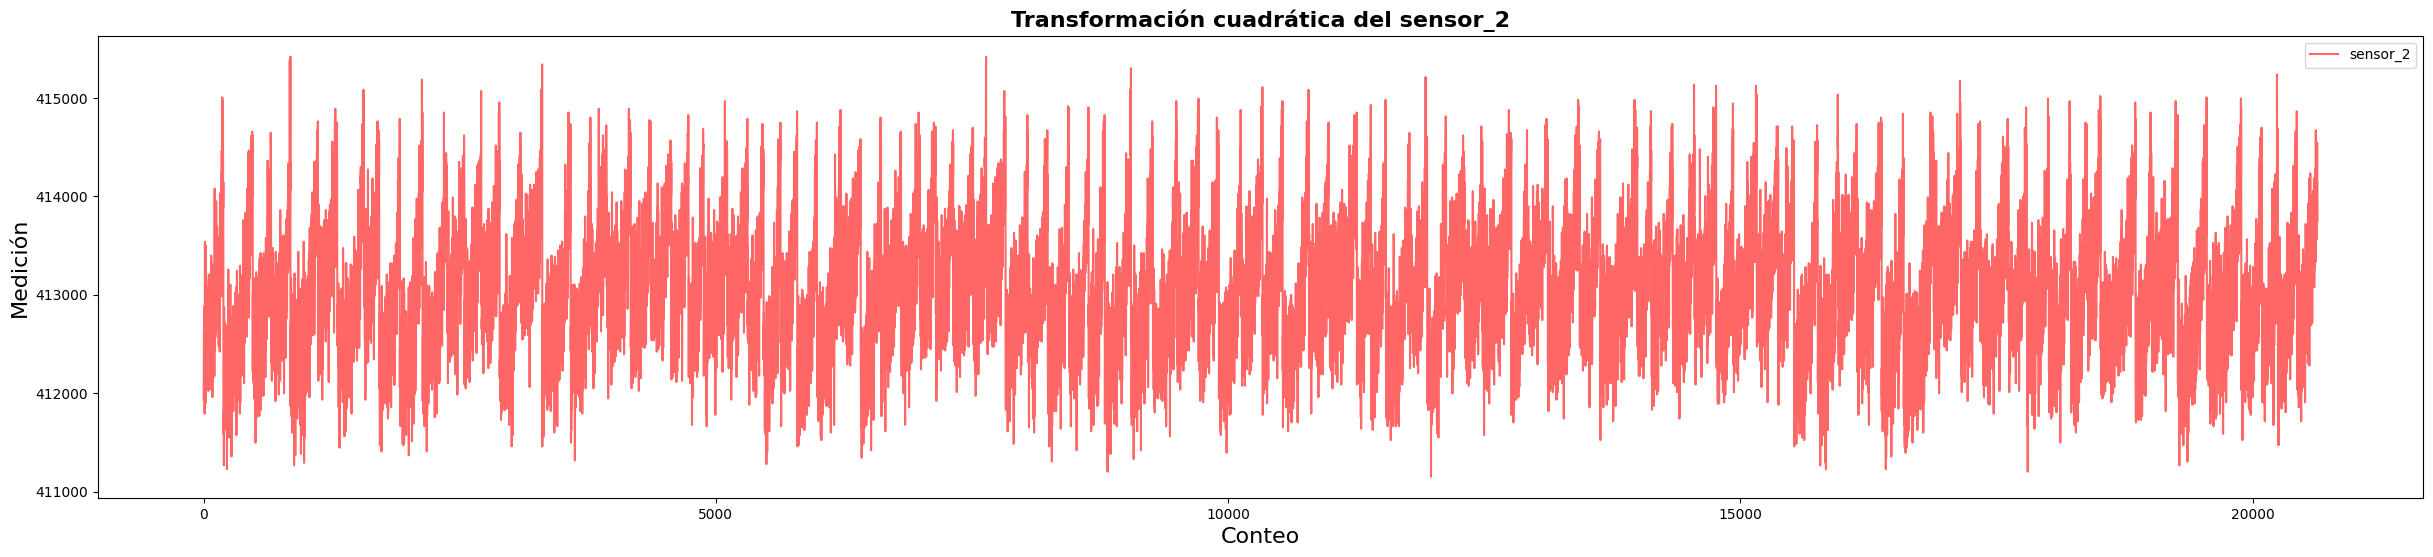

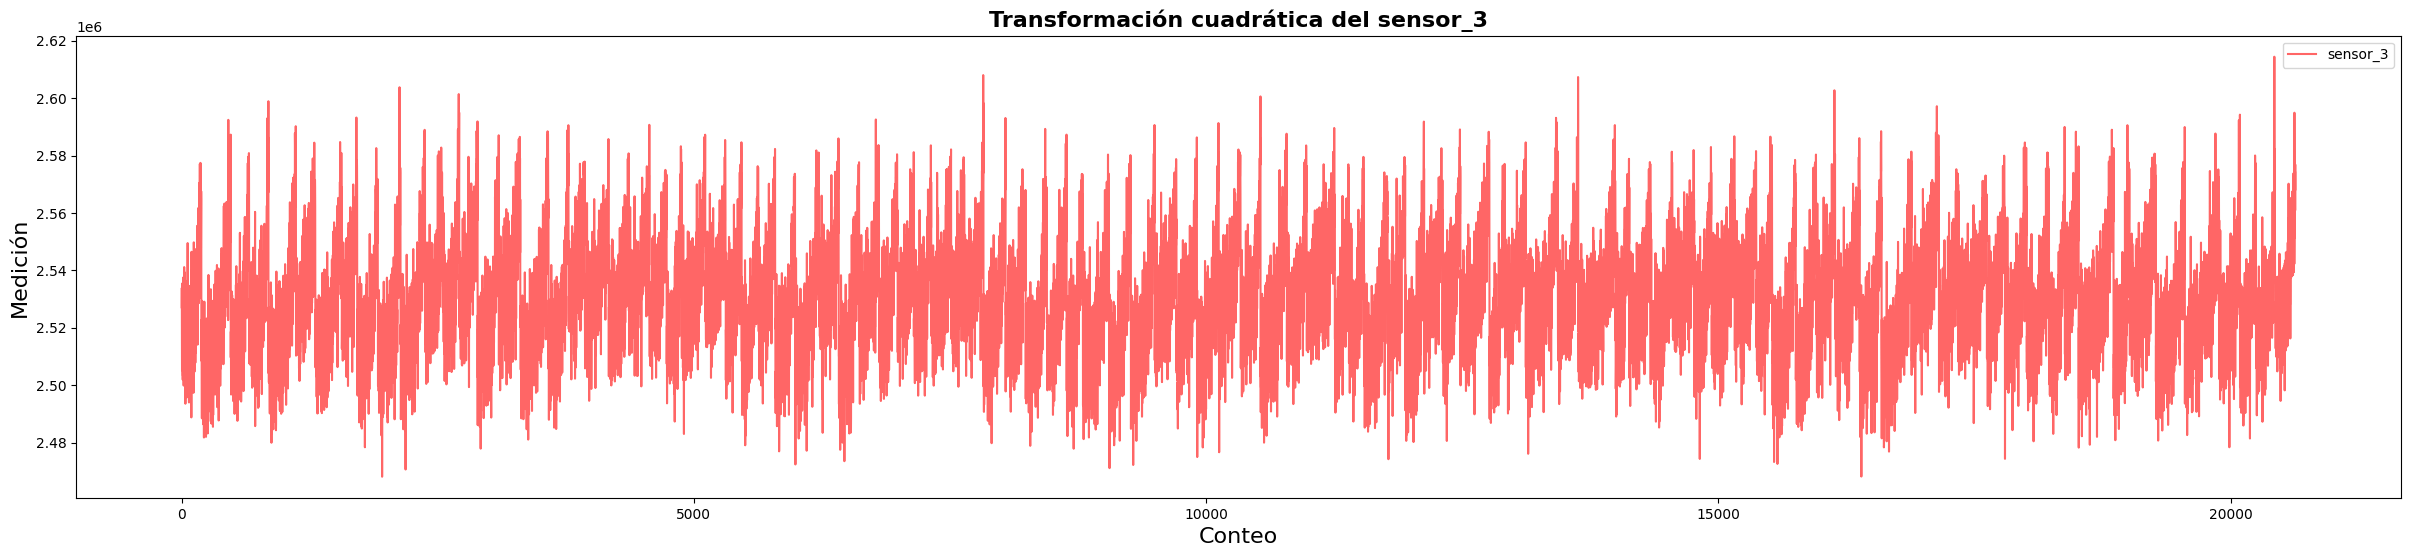

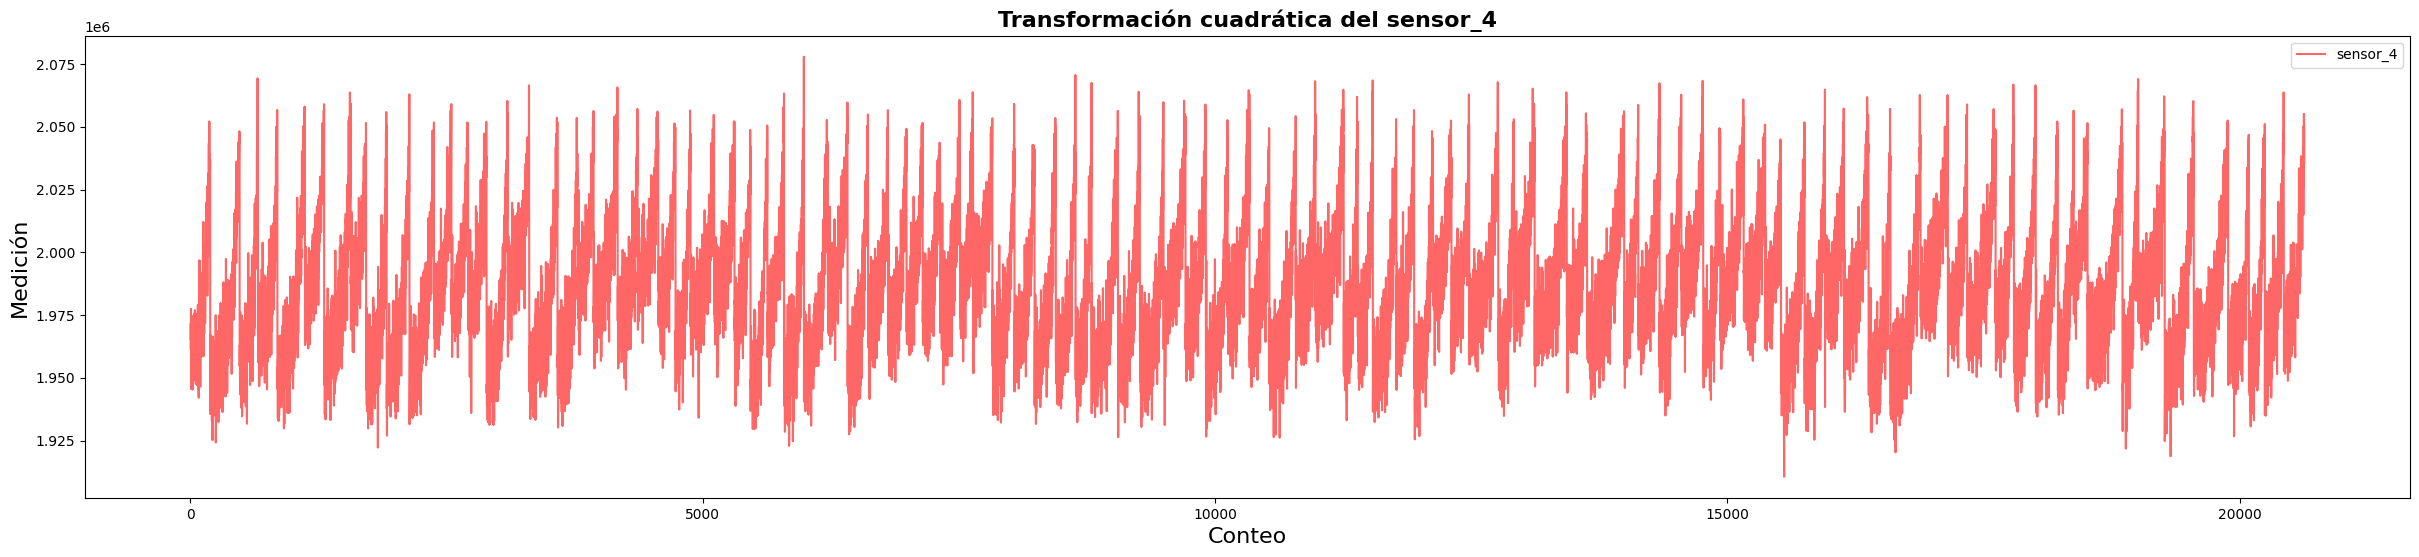

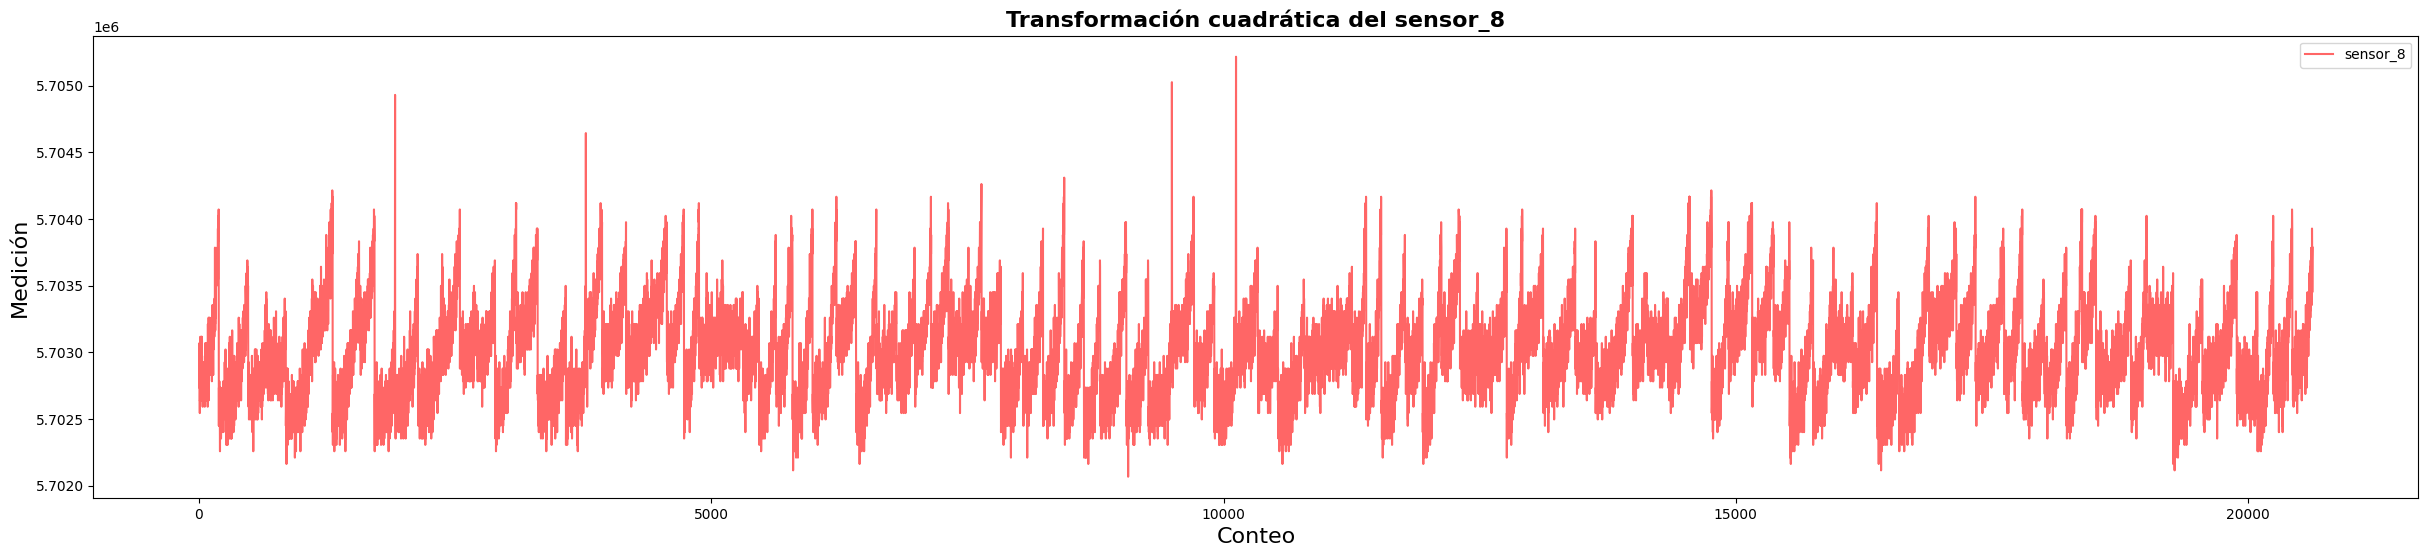

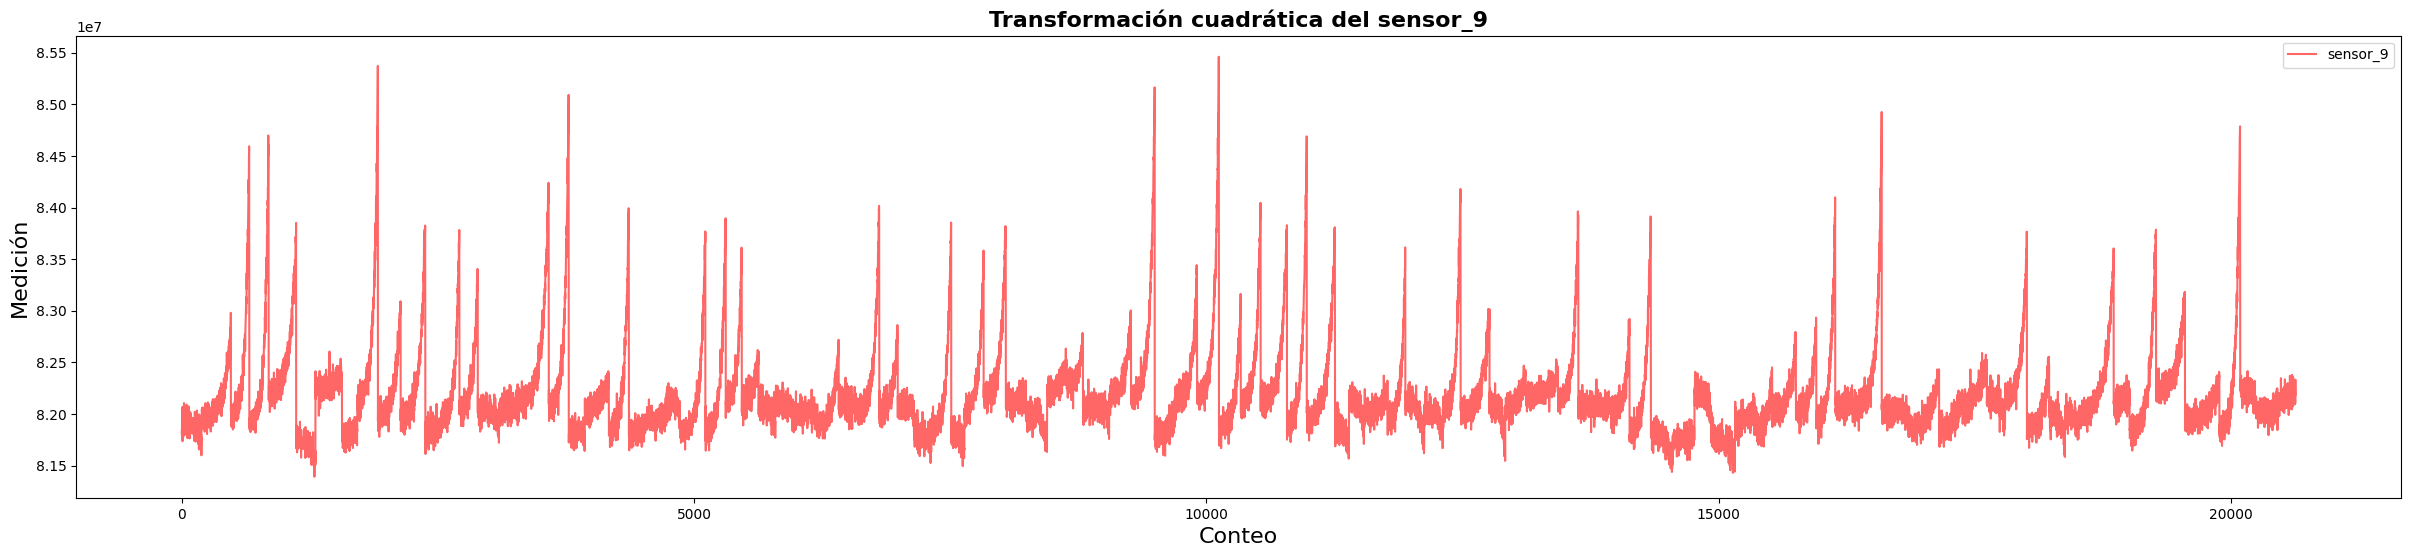

In [9]:
for sensor in sensores: 
    ax = cuadrada(df, sensores).plot(
        x='conteo',
        y=sensor,
        figsize=(30, 6),
        title=f'Serie del {sensor} en escala cuadrática',
        color = 'red',
        alpha = 0.6)
    
    ax.set_xlabel('Conteo', fontsize=16)
    ax.set_ylabel('Medición', fontsize=16)
    ax.set_title(f'Transformación cuadrática del {sensor}', fontsize=16, fontweight='bold')
    ax.legend([sensor])
    plt.savefig(f"img/5_{sensor}.png")
    plt.show()

# 5 Raíz


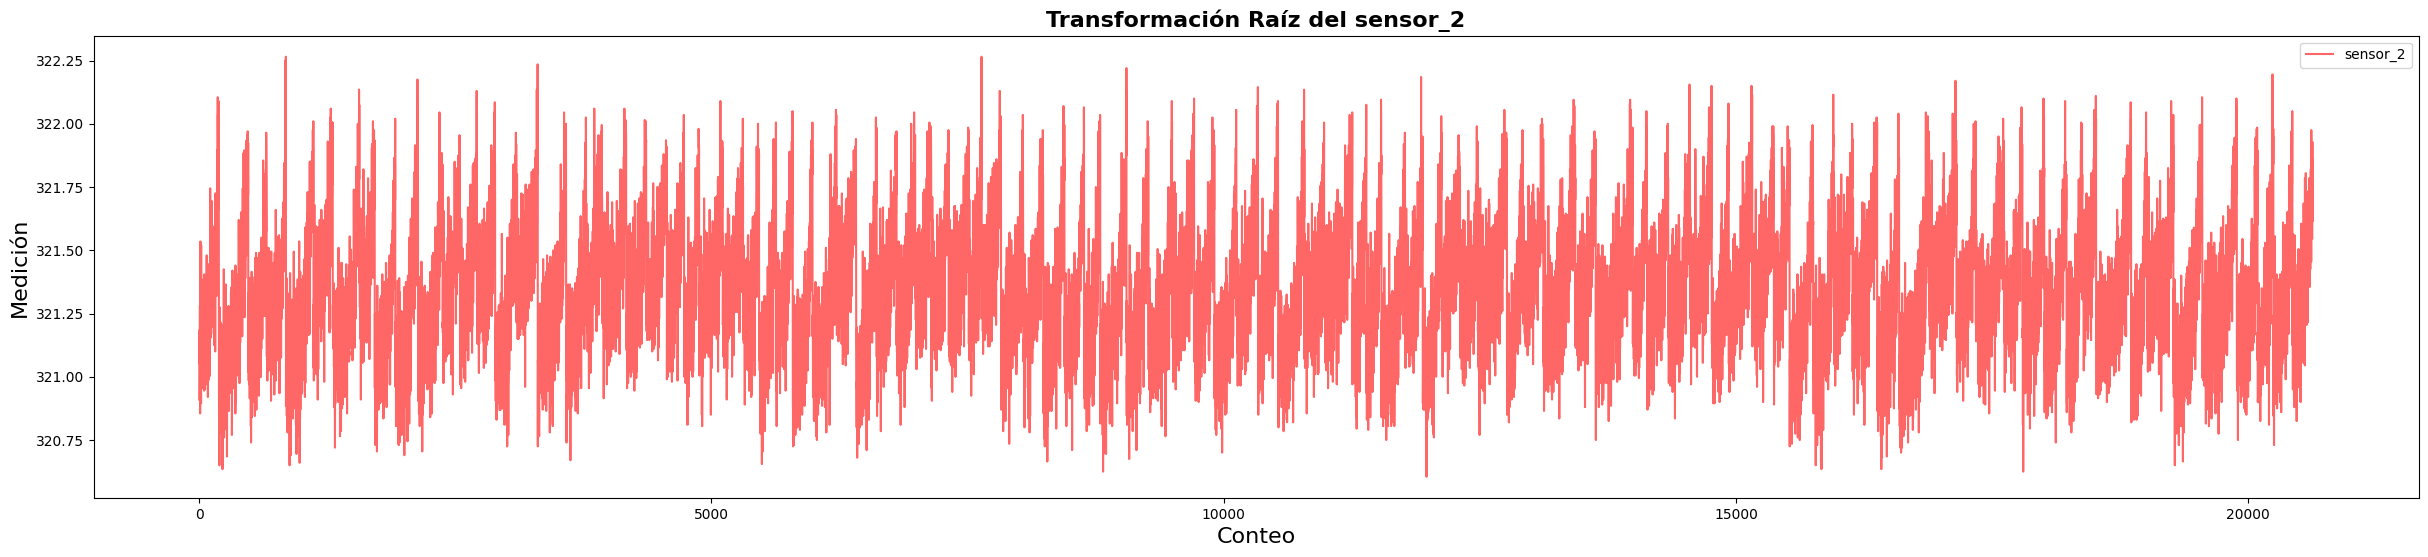

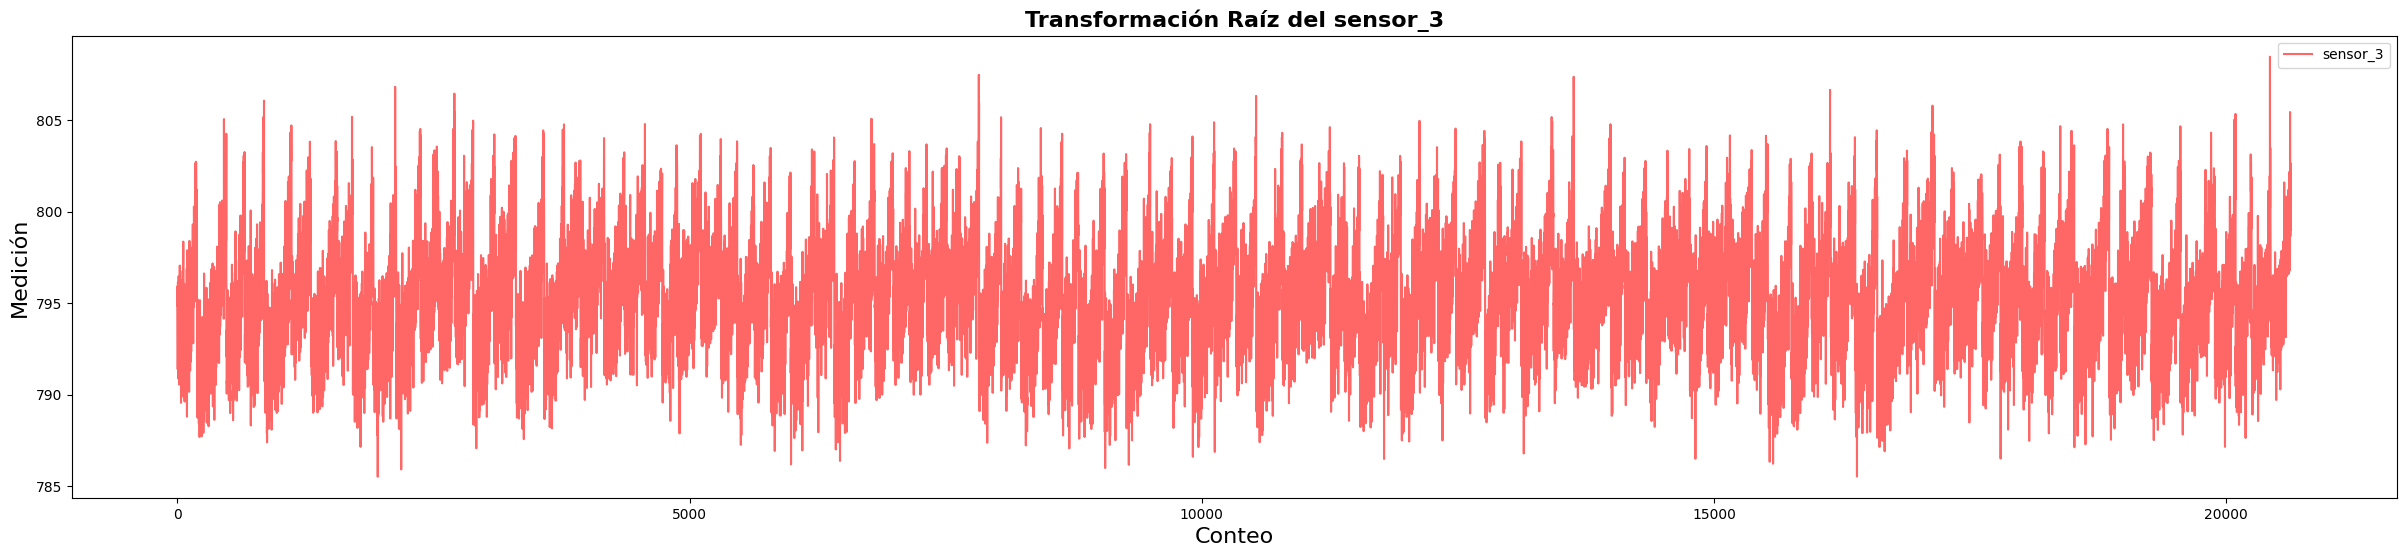

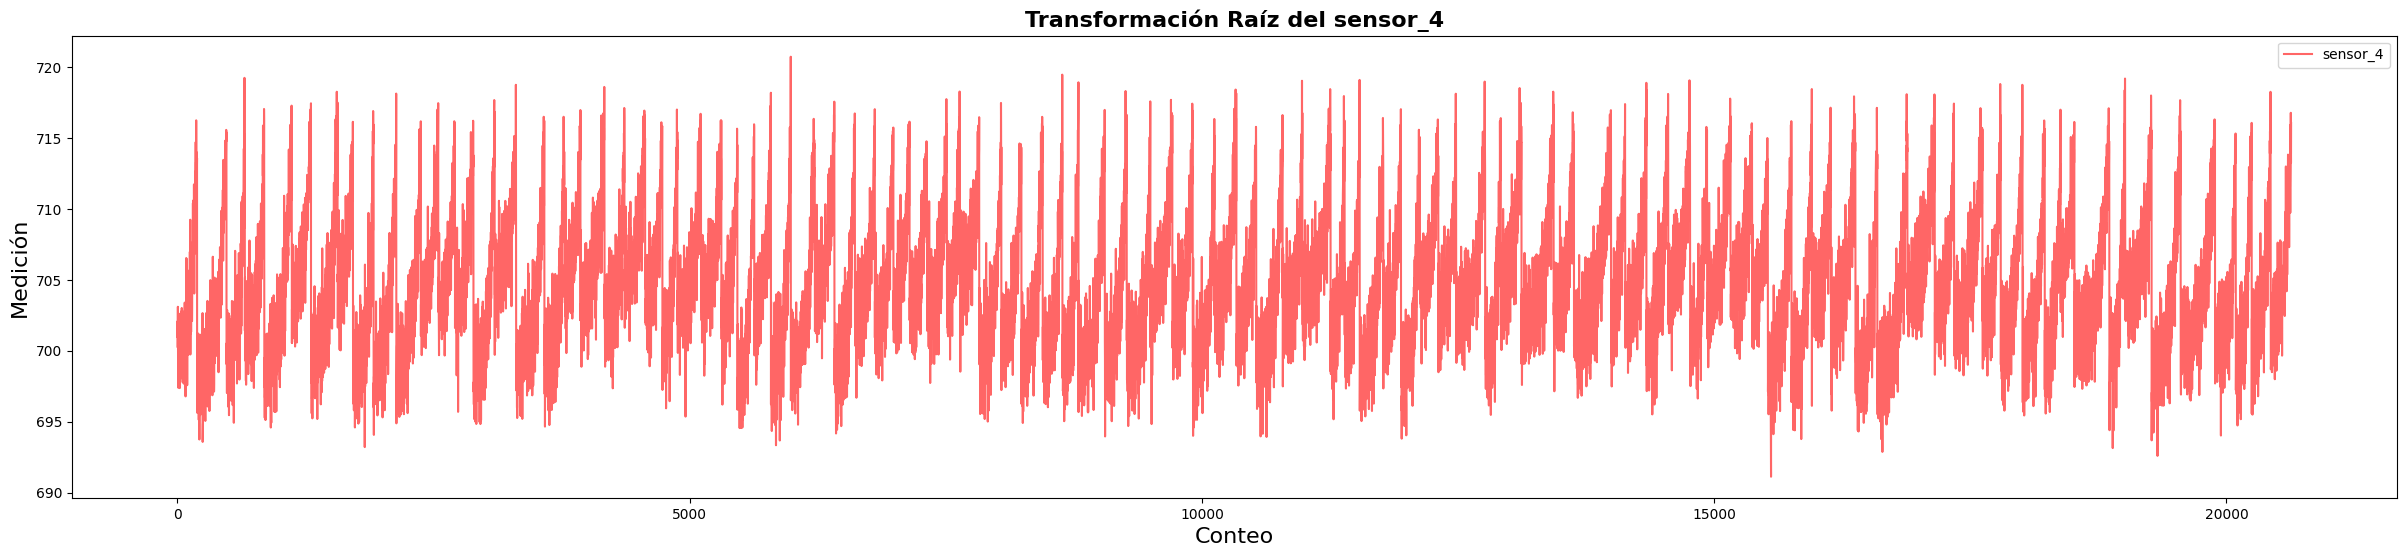

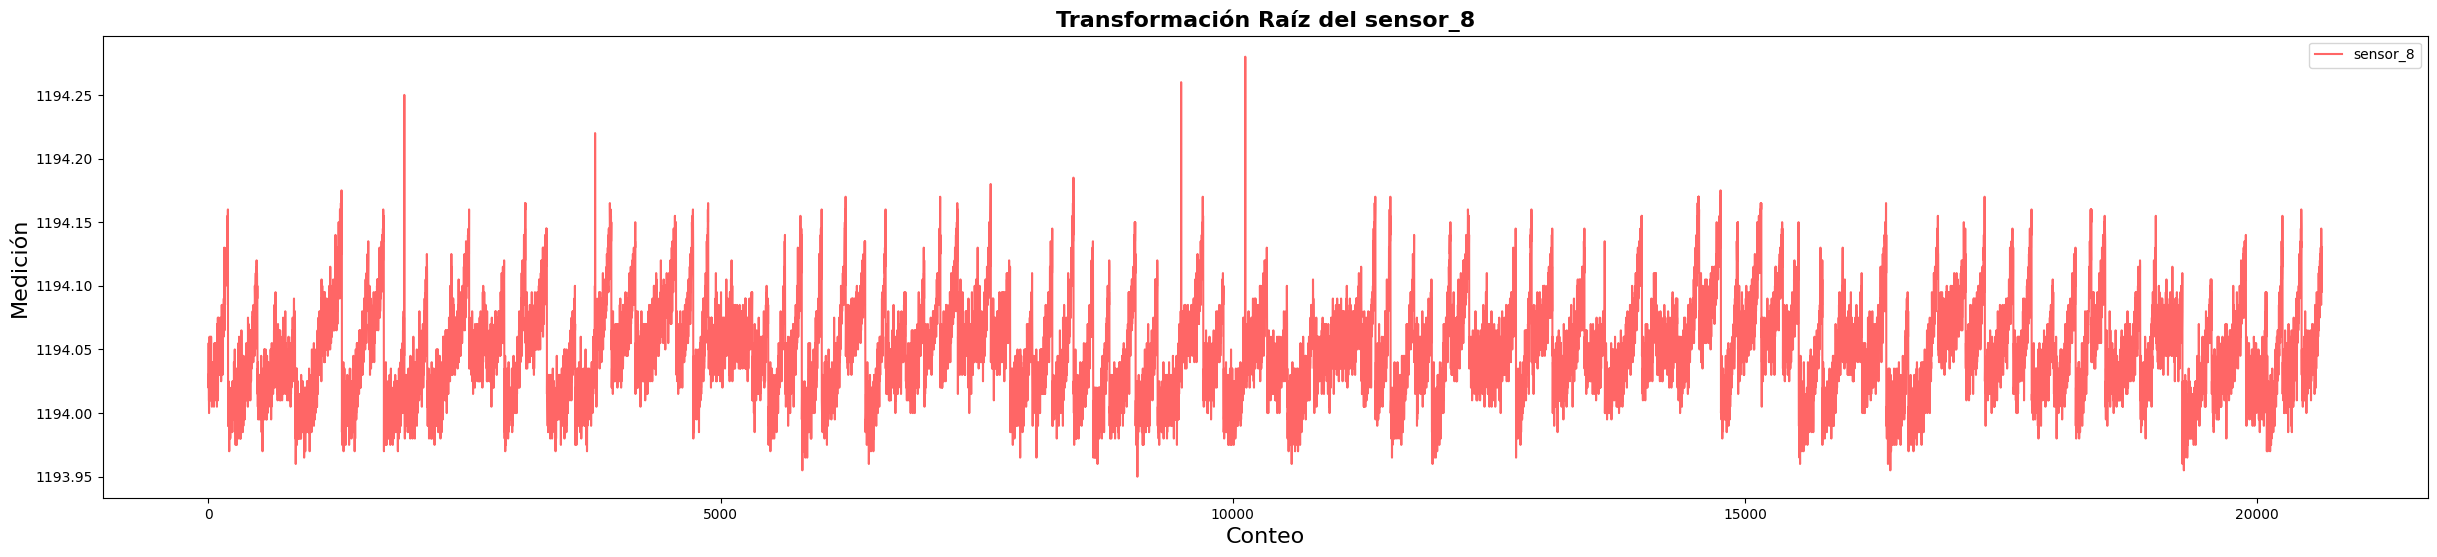

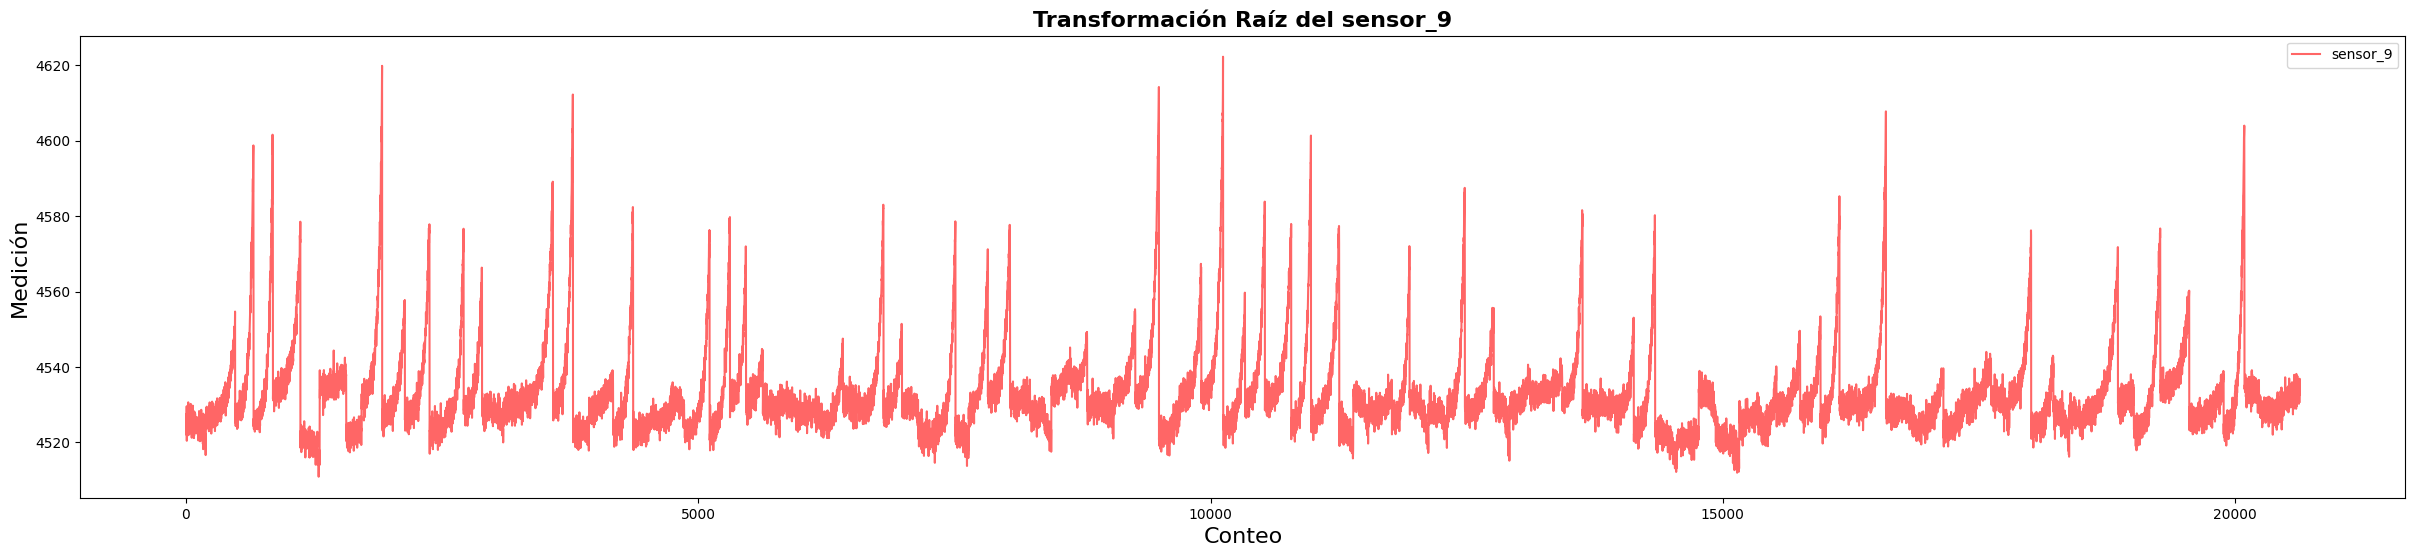

In [10]:
for sensor in sensores: 
    ax = raiz(df, sensores).plot(
        x='conteo',
        y=sensor,
        figsize=(30, 6),
        title=f'Serie del {sensor} en escala raíz',
        color = 'red',
        alpha = 0.6)
    
    ax.set_xlabel('Conteo', fontsize=16)
    ax.set_ylabel('Medición', fontsize=16)
    ax.set_title(f'Transformación Raíz del {sensor}', fontsize=16, fontweight='bold')
    plt.savefig(f"img/5_{sensor}_r.png")
    plt.show()

# 6 Diferenciaciónes

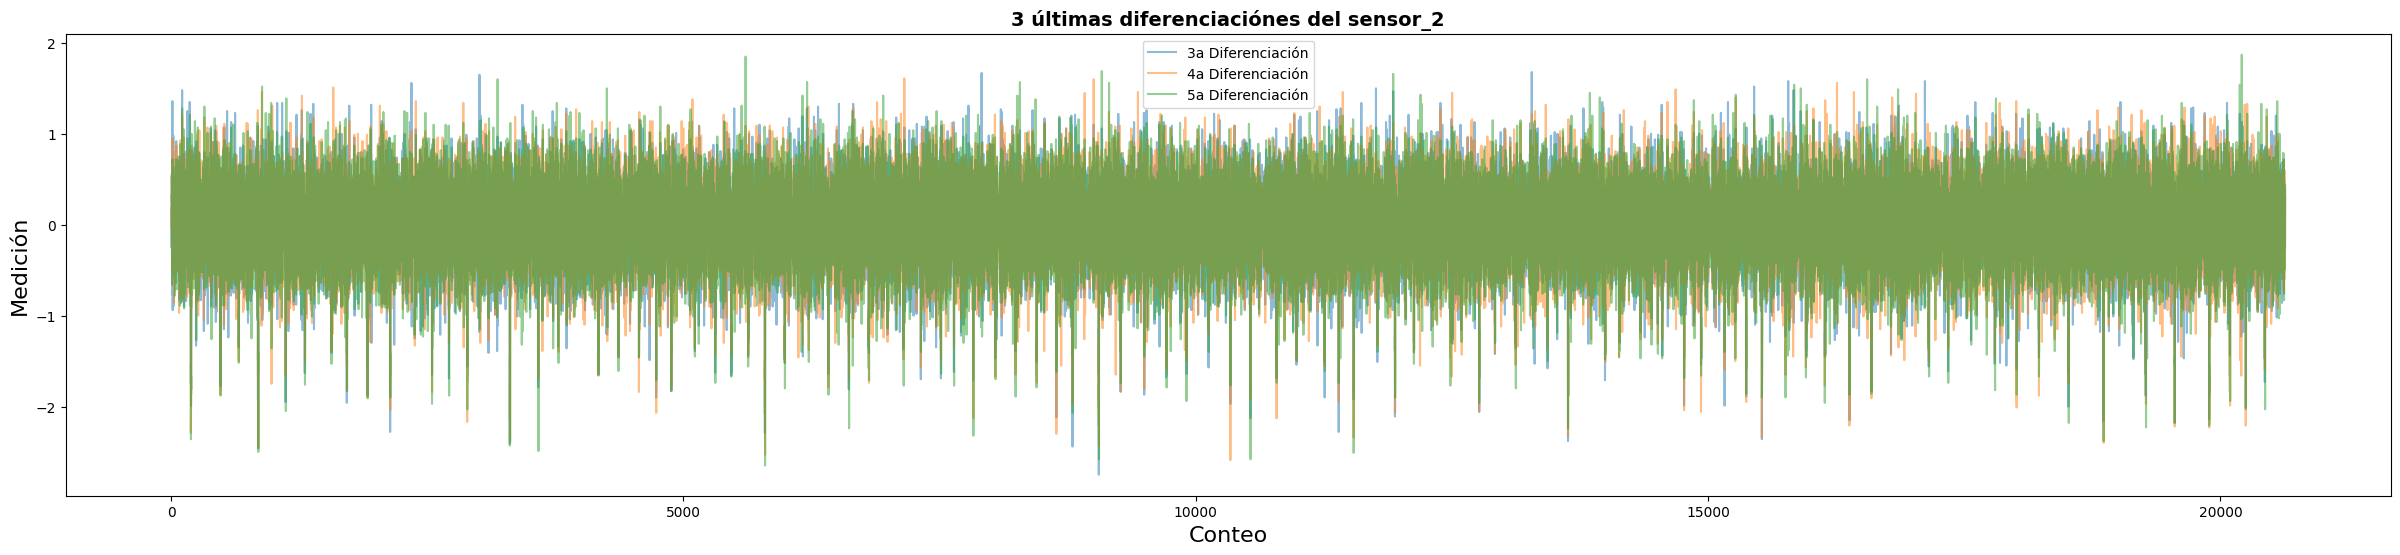

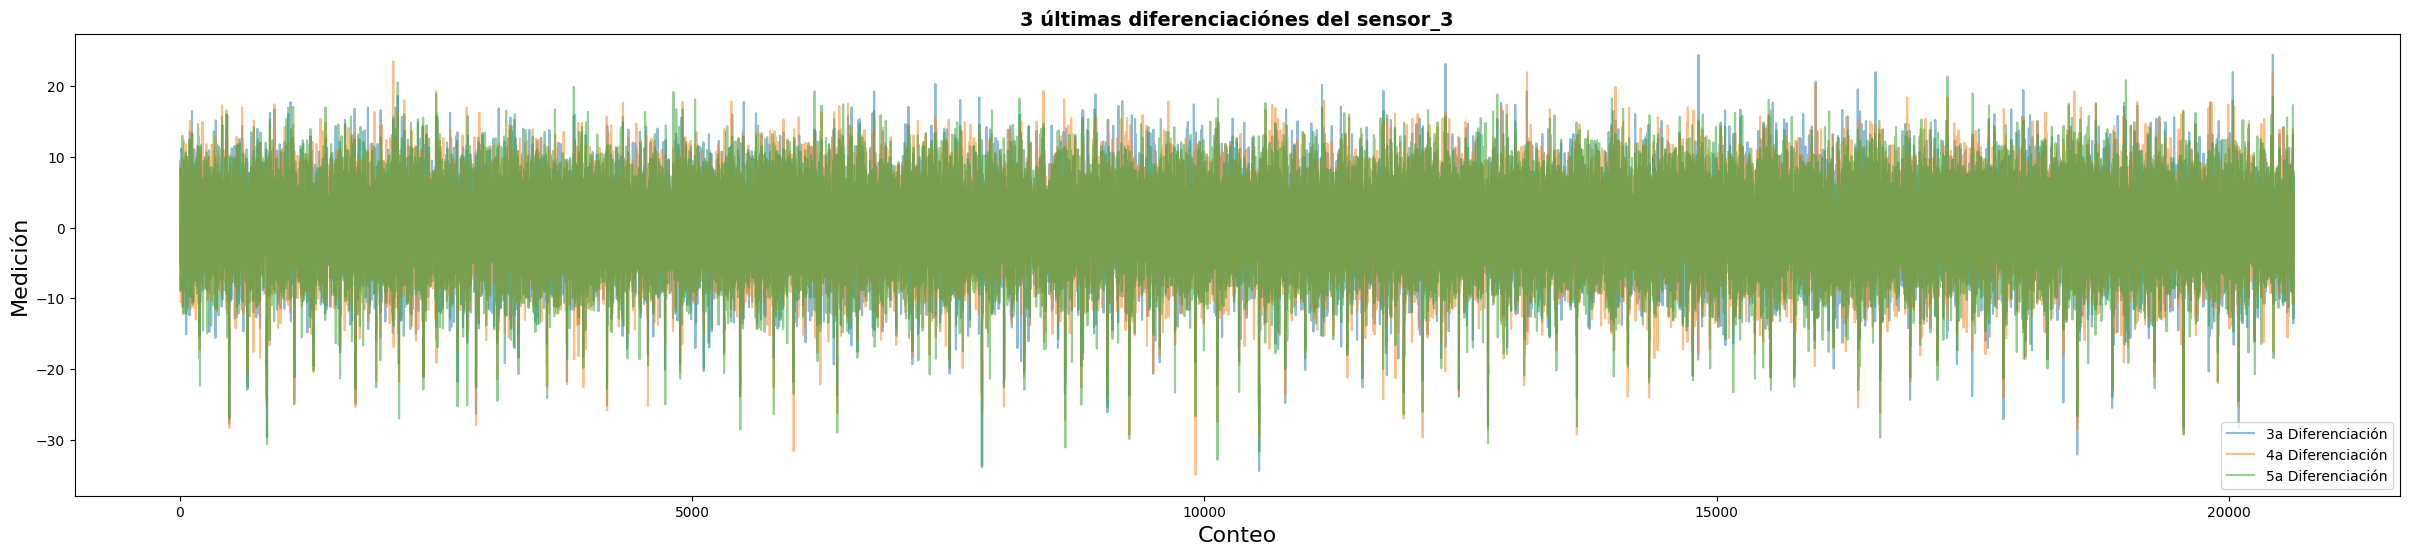

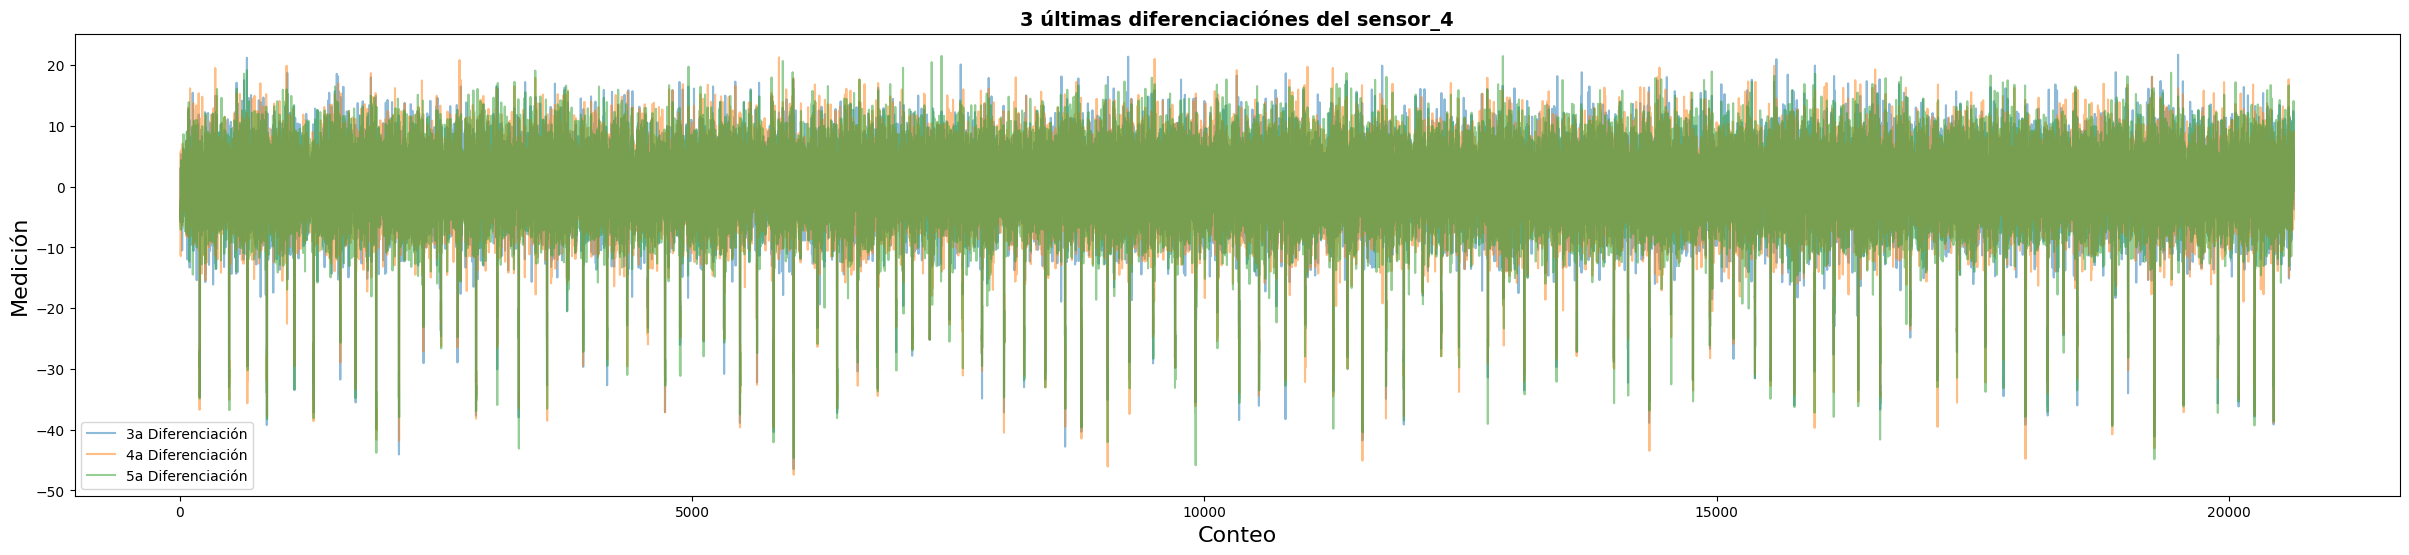

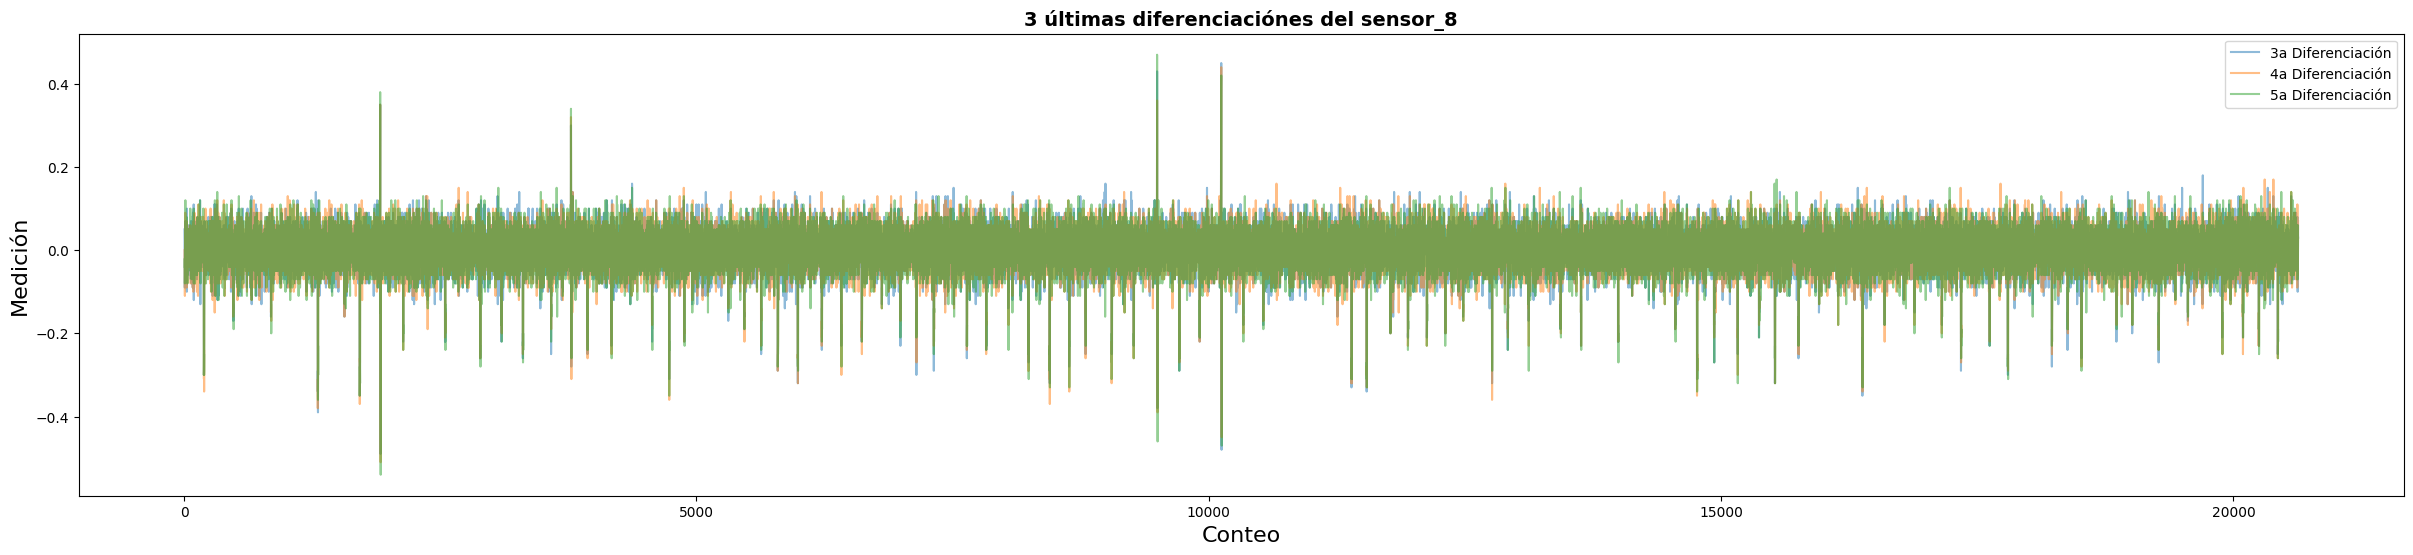

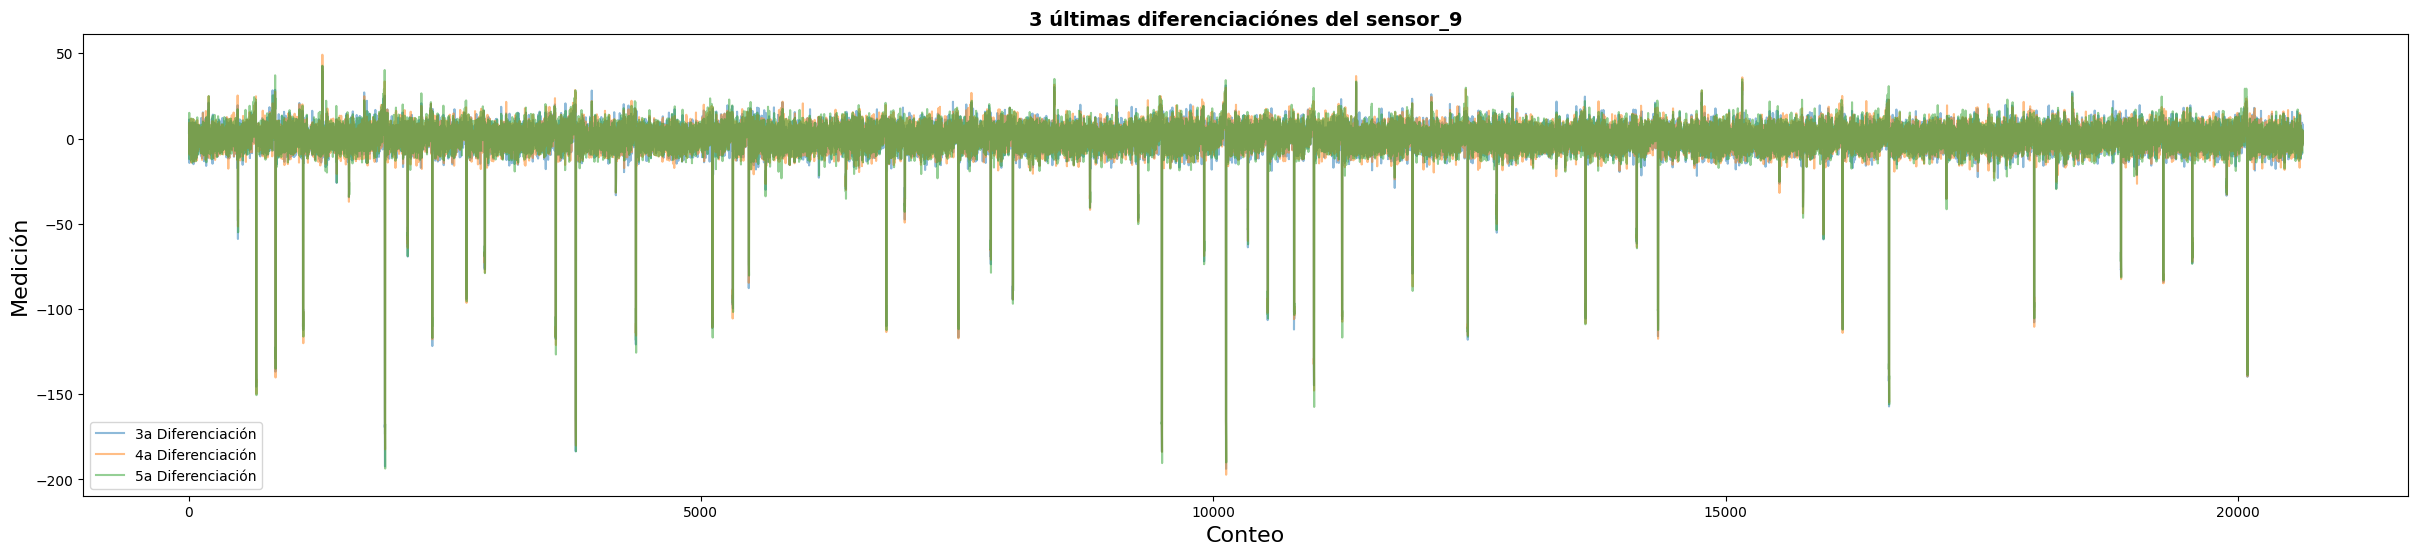

In [11]:
for sensor in sensores: 
    fig, ax = plt.subplots(figsize=(30, 6))

    for i in range(3, 6):
        df_diff = diferenciar(df, i, [sensor])
        ax.plot(
            df['conteo'],
            df_diff[sensor],
            label=f'{i}a Diferenciación',
            alpha = 0.5)
    
    ax.set_xlabel('Conteo', fontsize=16)
    ax.set_ylabel('Medición', fontsize=16)
    ax.set_title(f'3 últimas diferenciaciónes del {sensor}', fontsize=14, fontweight='bold')
    ax.legend()
    plt.savefig(f"img/6_{sensor}.png")
    plt.show()

# 7 Estandarización

# 8 Normalización 

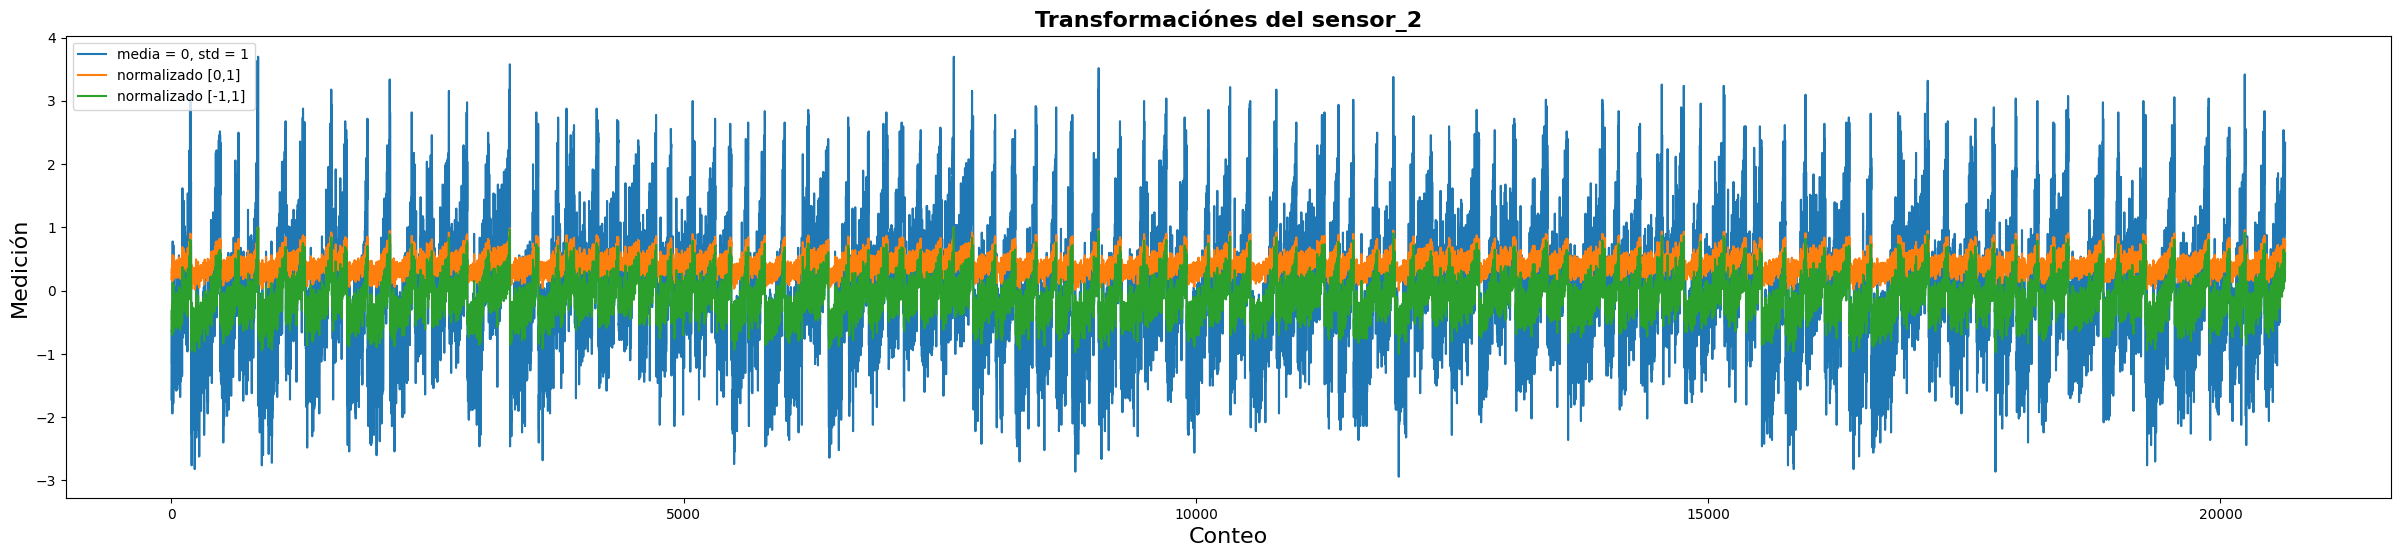

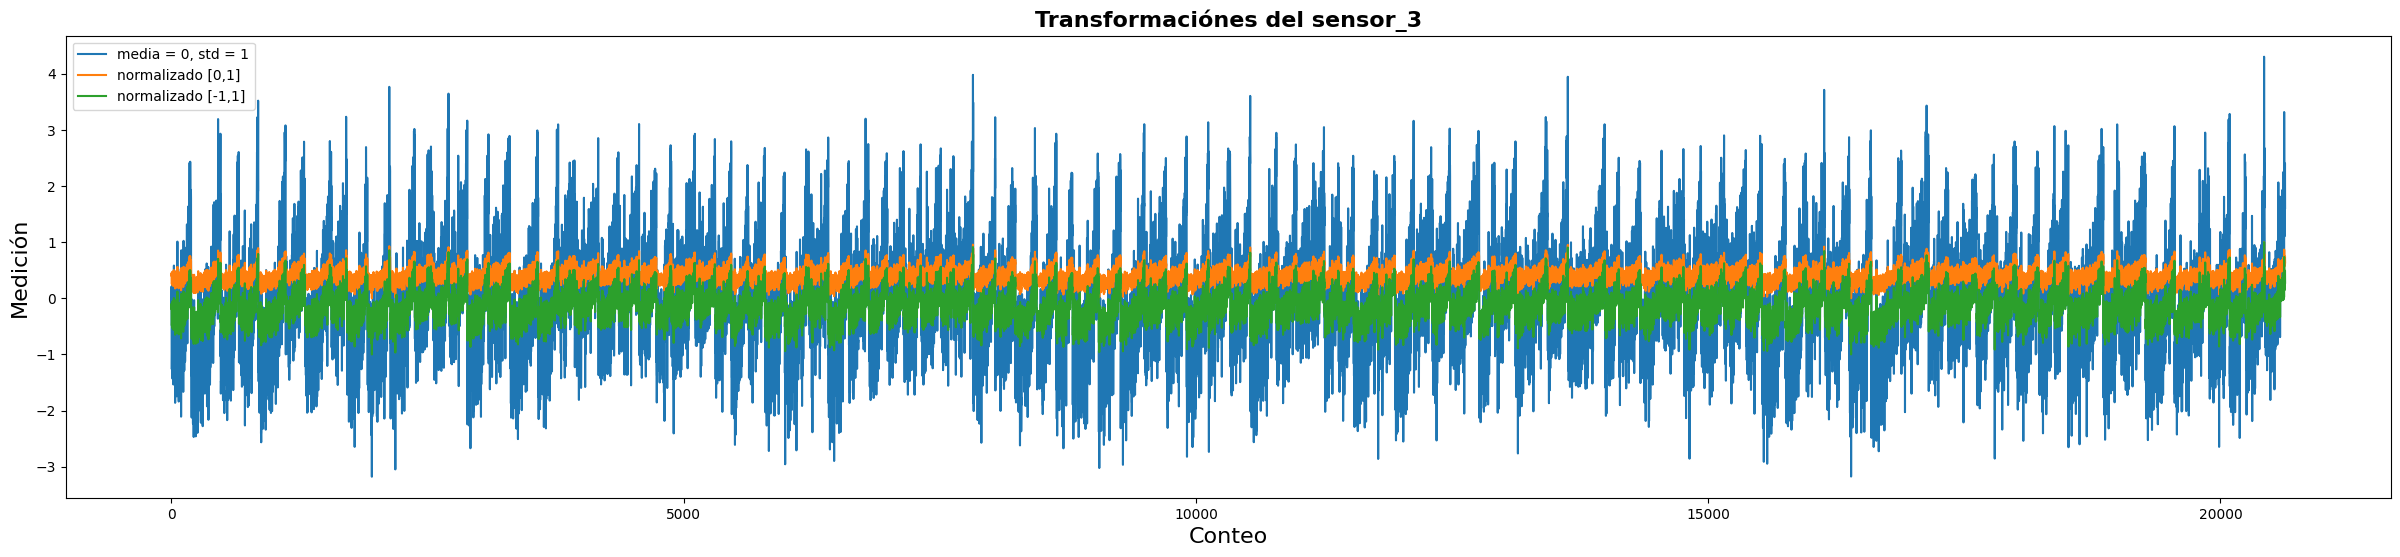

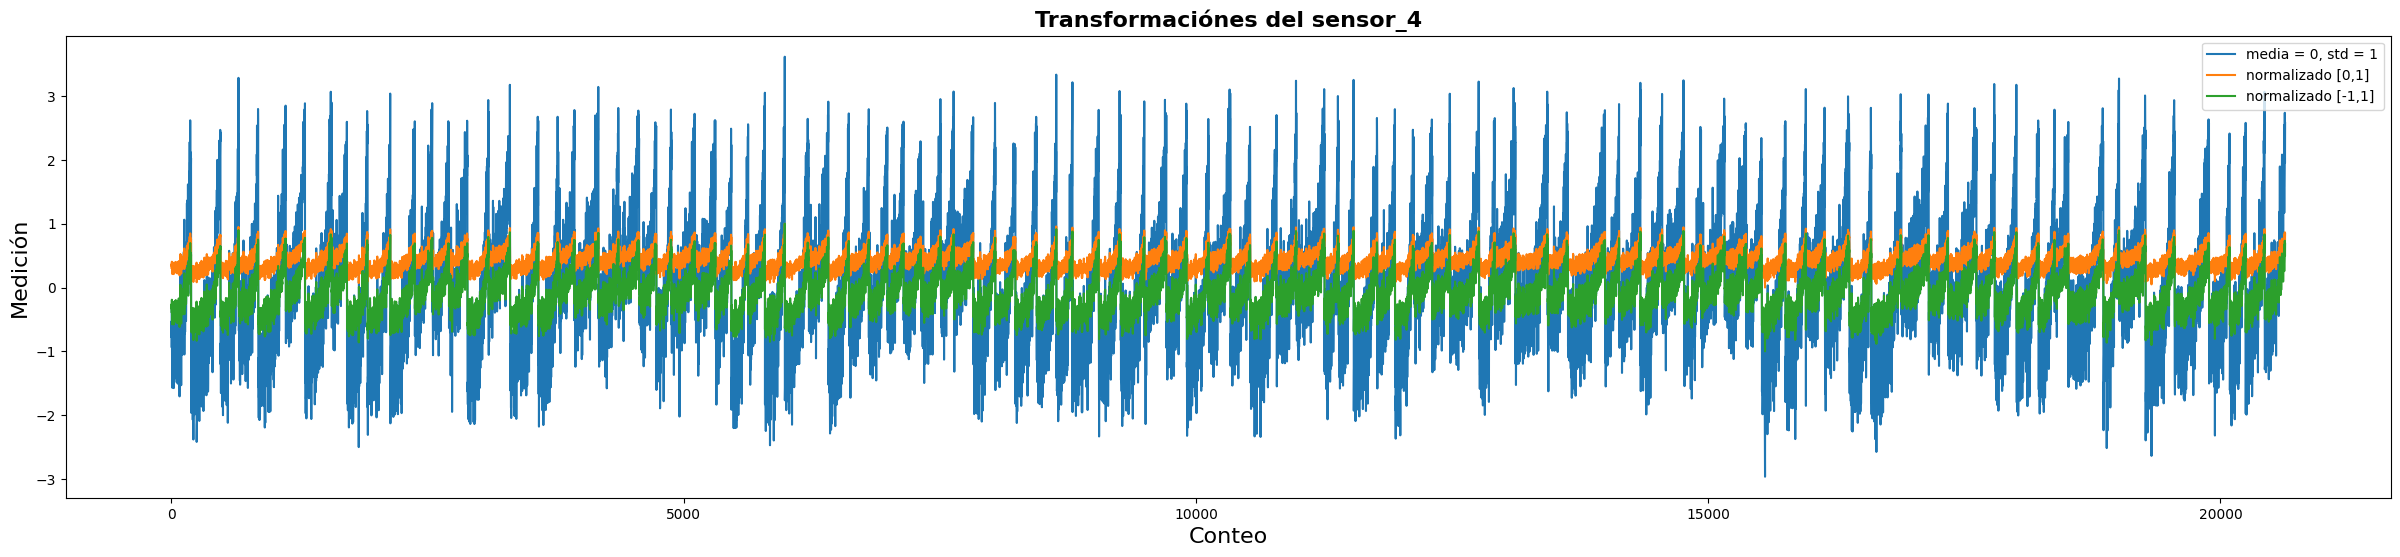

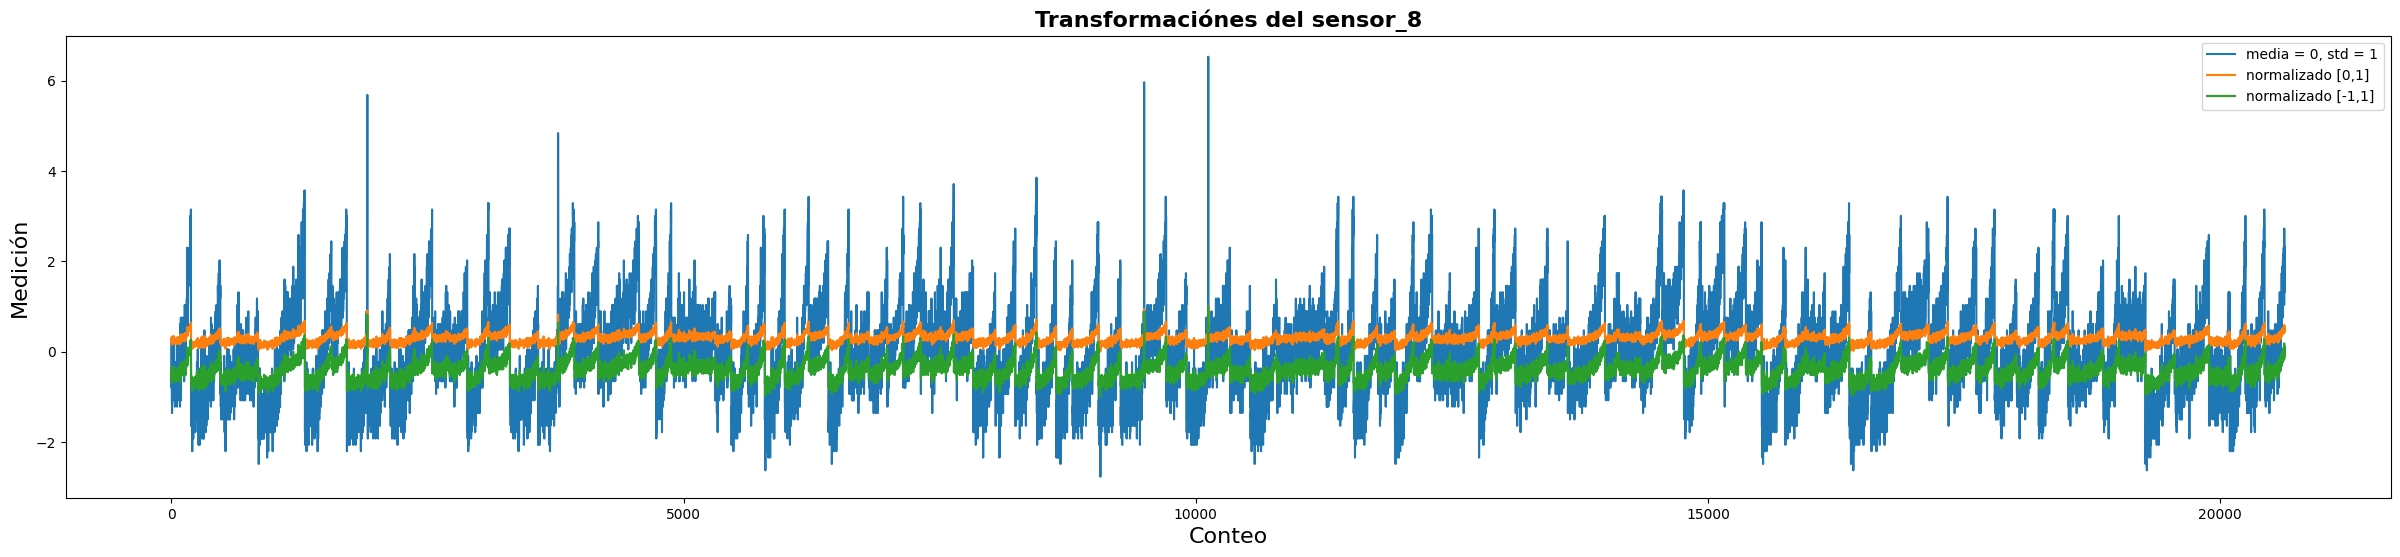

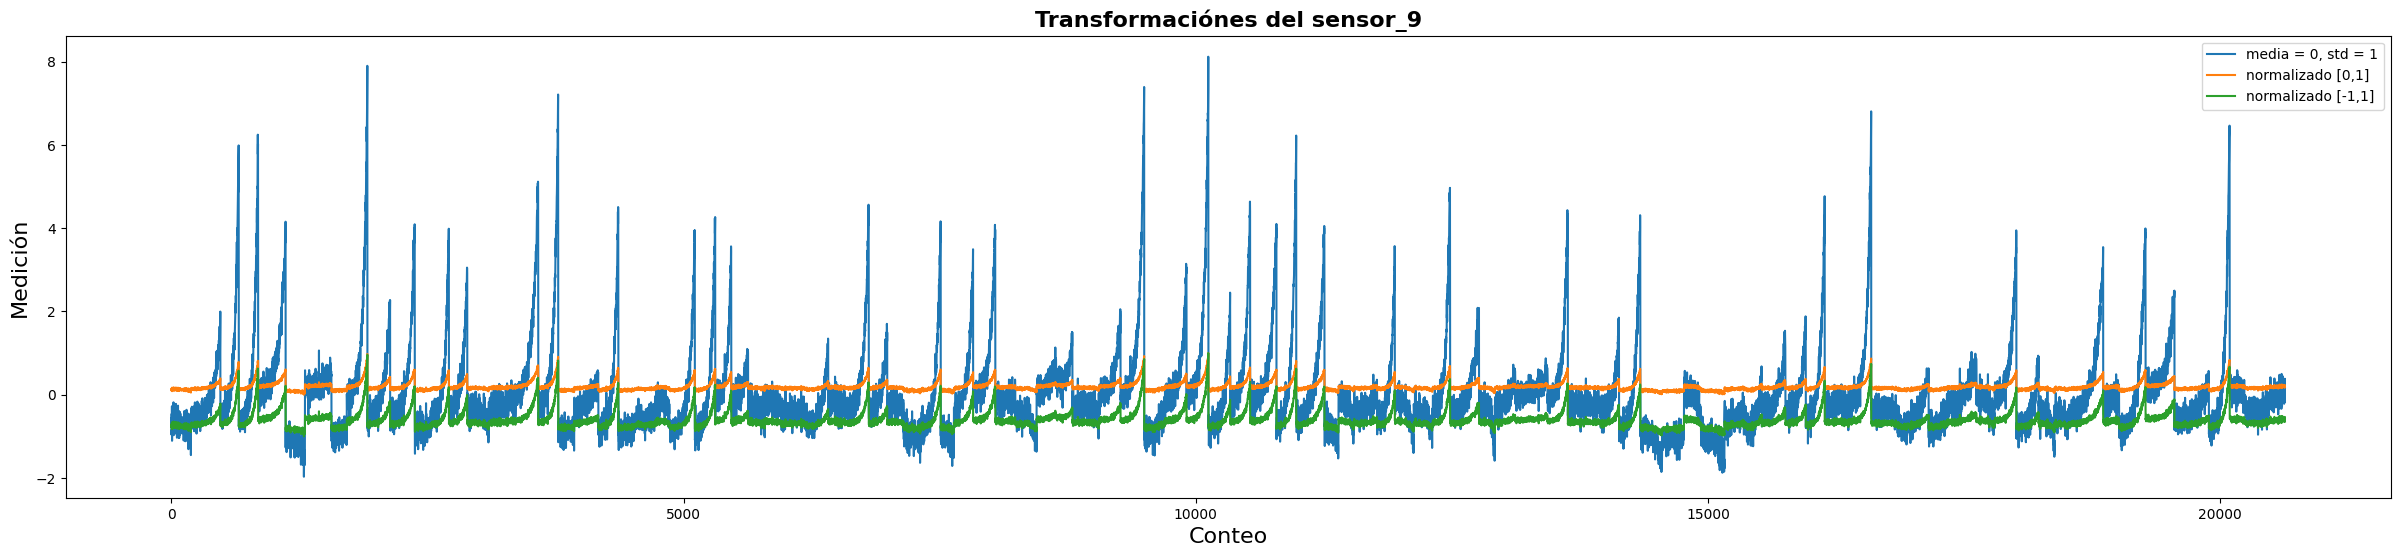

In [12]:
for sensor in sensores: 
    fig, ax = plt.subplots(figsize=(30, 6))

    # estandarizado
    df_estandarizado = estandarizar(df, [sensor])
    ax.plot(
        df['conteo'],
        df_estandarizado[sensor],
        label=f'media = 0, std = 1')
    
    # normalizado [0,1]
    df_normalizado = normalizar_0_1(df, [sensor])
    ax.plot(
        df['conteo'],
        df_normalizado[sensor],
        label=f'normalizado [0,1]')
    
    # normalizado [-1,1]
    df_normalizado2 = normalizar_neg1_1(df, [sensor])
    ax.plot(
        df['conteo'],
        df_normalizado2[sensor],
        label=f'normalizado [-1,1]')
    
    ax.set_xlabel('Conteo', fontsize=16)
    ax.set_ylabel('Medición', fontsize=16)
    ax.set_title(f'Transformaciónes del {sensor}', fontsize=16, fontweight='bold')
    ax.legend()
    plt.savefig(f"img/6_{sensor}.png")
    plt.show()

## 9 Análisis en el reporte   

## 10 Correlograma de la Serie

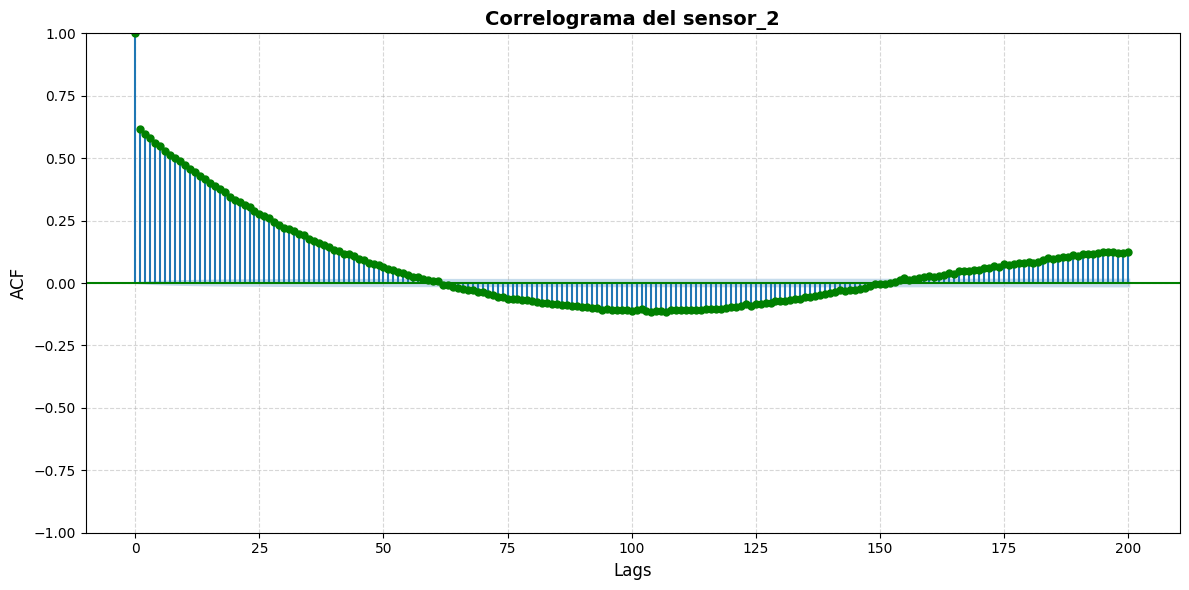

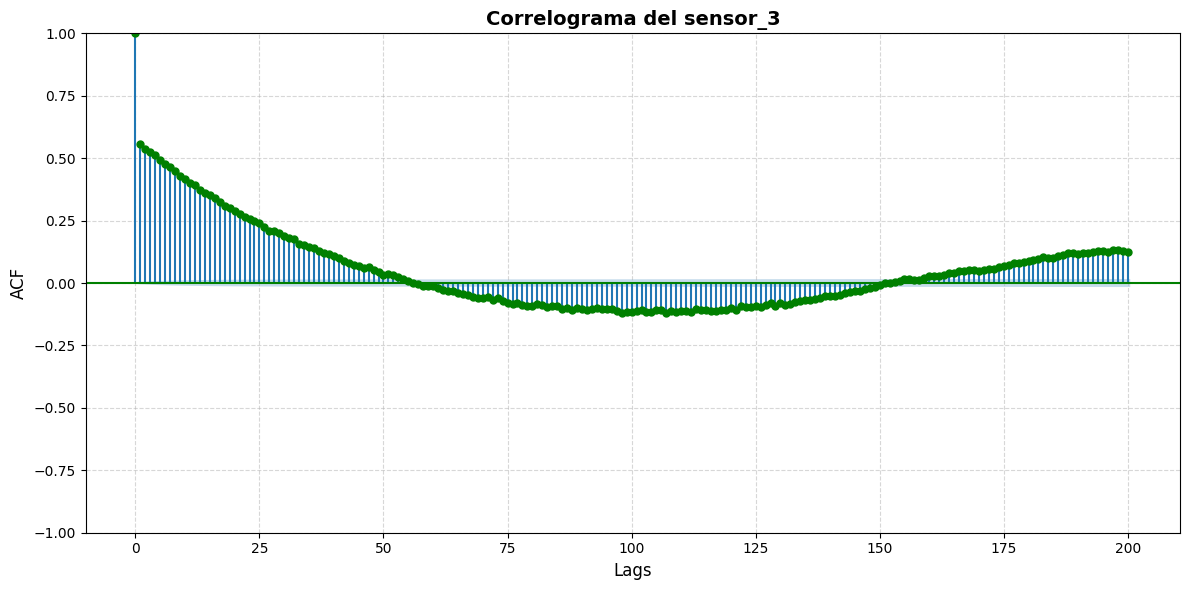

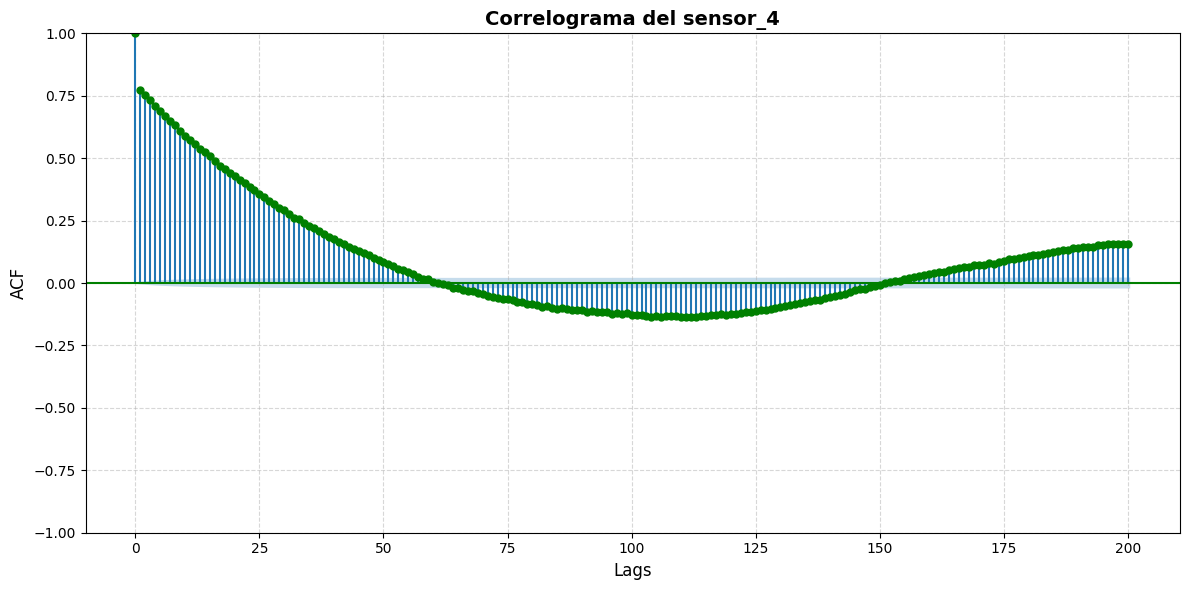

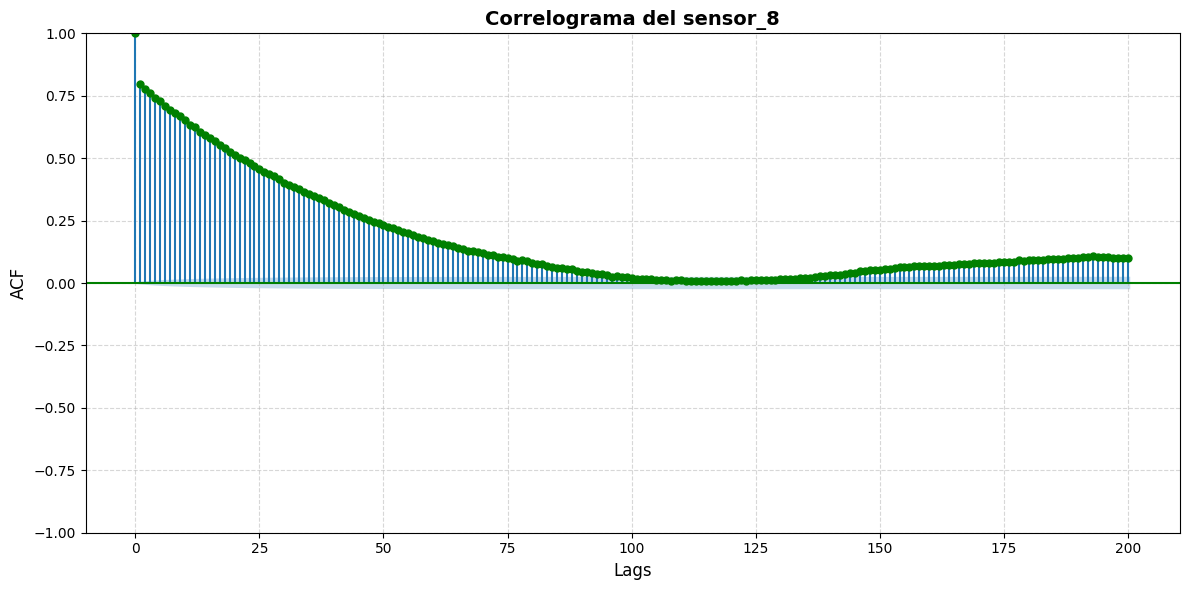

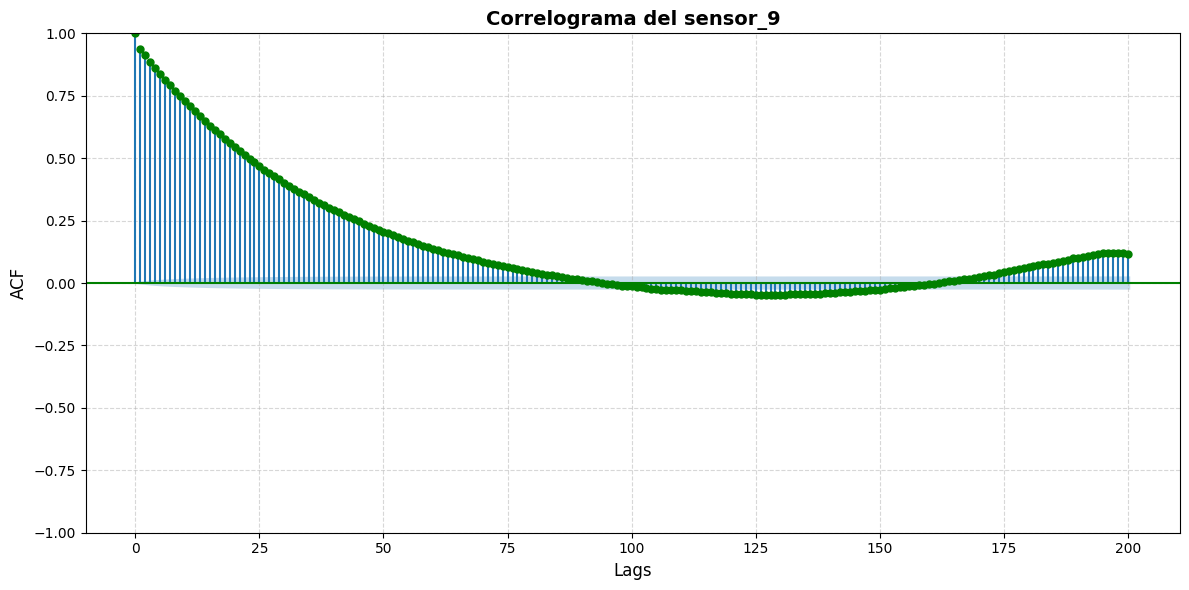

In [13]:
for sensor in sensores:
    fig, ax = plt.subplots(figsize=(12, 6))  

    plot_acf(
        df[sensor],
        lags=200,
        ax=ax,
        alpha=0.5,         
        color='green',  
        title=''             
    )

    ax.set_xlabel('Lags', fontsize=12)
    ax.set_ylabel('ACF', fontsize=12)
    ax.set_title(f'Correlograma del {sensor}', fontsize=14, fontweight='bold')
    ax.grid(True, linestyle='--', alpha=0.5)  

    plt.tight_layout()
    plt.savefig(f"img/10_{sensor}.png")
    plt.show()
